In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [2]:
euro_data = 'data/eurocup_2020_results.csv'
euro_data_df = pd.read_csv(euro_data)

# EDA for Euro data

In [3]:
euro_data_df.head()

,stage,date,pens,pens_home_score,pens_away_score,team_name_home,team_name_away,team_home_score,team_away_score,possession_home,possession_away,total_shots_home,total_shots_away,shots_on_target_home,shots_on_target_away,duels_won_home,duels_won_away,events_list,lineup_home,lineup_away
0,Final,11.07.2021,True,3,2,Italy,England,1,1,66%,34%,19,6,6,2,53%,47%,"[{'event_team': 'away', 'event_time': "" 2' "", ...","[{'Player_Name': 'Insigne', 'Player_Number': '...","[{'Player_Name': 'Kane', 'Player_Number': '9'}..."
1,Semi-finals,07.07.2021,False,False,False,England,Denmark,2,1,59%,41%,20,6,10,3,50%,50%,"[{'event_team': 'away', 'event_time': "" 30' "",...","[{'Player_Name': 'Kane', 'Player_Number': '9'}...","[{'Player_Name': 'Krogh Damsgaard', 'Player_Nu..."
2,Semi-finals,06.07.2021,True,4,2,Italy,Spain,1,1,29%,71%,7,16,4,5,49%,51%,"[{'event_team': 'away', 'event_time': "" 51' "",...","[{'Player_Name': 'Insigne', 'Player_Number': '...","[{'Player_Name': 'Torres', 'Player_Number': '1..."
3,Quarter-finals,03.07.2021,False,False,False,Ukraine,England,0,4,48%,52%,7,10,2,6,42%,59%,"[{'event_team': 'away', 'event_time': "" 4' "", ...","[{'Player_Name': 'Yaremchuk', 'Player_Number':...","[{'Player_Name': 'Kane', 'Player_Number': '9'}..."
4,Quarter-finals,03.07.2021,False,False,False,Czech Republic,Denmark,1,2,56%,44%,16,11,5,7,48%,52%,"[{'event_team': 'away', 'event_time': "" 5' "", ...","[{'Player_Name': 'Schick', 'Player_Number': '1...","[{'Player_Name': 'Dolberg', 'Player_Number': '..."


In [4]:
euro_data_df.describe()

,team_home_score,team_away_score,total_shots_home,total_shots_away,shots_on_target_home,shots_on_target_away
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,1.196078,1.588235,12.137255,12.235294,3.803922,4.352941
std,1.077397,1.344269,6.190378,5.788223,2.545738,2.681966
min,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000
25%,0.000000,1.000000,7.000000,8.500000,2.000000,2.000000
50%,1.000000,1.000000,11.000000,11.000000,4.000000,4.000000
75%,2.000000,2.000000,17.000000,16.000000,6.000000,6.500000
max,3.000000,5.000000,27.000000,28.000000,10.000000,10.000000


In [5]:
euro_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   stage                 51 non-null     object
 1   date                  51 non-null     object
 2   pens                  51 non-null     bool  
 3   pens_home_score       51 non-null     object
 4   pens_away_score       51 non-null     object
 5   team_name_home        51 non-null     object
 6   team_name_away        51 non-null     object
 7   team_home_score       51 non-null     int64 
 8   team_away_score       51 non-null     int64 
 9   possession_home       51 non-null     object
 10  possession_away       51 non-null     object
 11  total_shots_home      51 non-null     int64 
 12  total_shots_away      51 non-null     int64 
 13  shots_on_target_home  51 non-null     int64 
 14  shots_on_target_away  51 non-null     int64 
 15  duels_won_home        51 non-null     obje

In [6]:
euro_data_df.isnull().sum()

stage                   0
date                    0
pens                    0
pens_home_score         0
pens_away_score         0
team_name_home          0
team_name_away          0
team_home_score         0
team_away_score         0
possession_home         0
possession_away         0
total_shots_home        0
total_shots_away        0
shots_on_target_home    0
shots_on_target_away    0
duels_won_home          0
duels_won_away          0
events_list             0
lineup_home             0
lineup_away             0
dtype: int64

In [7]:
euro_data_df[['possession_home', 'possession_away', 'duels_won_home', 'duels_won_away']] = euro_data_df[['possession_home', 'possession_away', 'duels_won_home', 'duels_won_away']].apply(lambda x: x.str.strip().str.rstrip('%').astype(float) / 100)

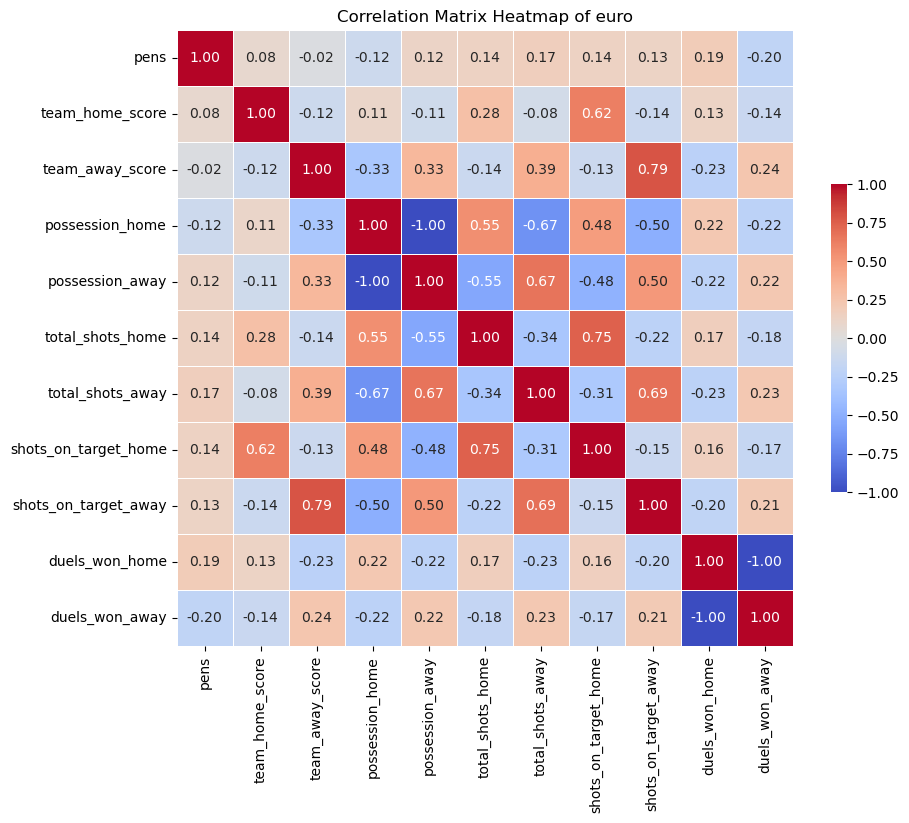

In [8]:
corr = euro_data_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix Heatmap of euro')
plt.show()

In [9]:
euro_data_df.head()


,stage,date,pens,pens_home_score,pens_away_score,team_name_home,team_name_away,team_home_score,team_away_score,possession_home,possession_away,total_shots_home,total_shots_away,shots_on_target_home,shots_on_target_away,duels_won_home,duels_won_away,events_list,lineup_home,lineup_away
0,Final,11.07.2021,True,3,2,Italy,England,1,1,0.66,0.34,19,6,6,2,0.53,0.47,"[{'event_team': 'away', 'event_time': "" 2' "", ...","[{'Player_Name': 'Insigne', 'Player_Number': '...","[{'Player_Name': 'Kane', 'Player_Number': '9'}..."
1,Semi-finals,07.07.2021,False,False,False,England,Denmark,2,1,0.59,0.41,20,6,10,3,0.50,0.50,"[{'event_team': 'away', 'event_time': "" 30' "",...","[{'Player_Name': 'Kane', 'Player_Number': '9'}...","[{'Player_Name': 'Krogh Damsgaard', 'Player_Nu..."
2,Semi-finals,06.07.2021,True,4,2,Italy,Spain,1,1,0.29,0.71,7,16,4,5,0.49,0.51,"[{'event_team': 'away', 'event_time': "" 51' "",...","[{'Player_Name': 'Insigne', 'Player_Number': '...","[{'Player_Name': 'Torres', 'Player_Number': '1..."
3,Quarter-finals,03.07.2021,False,False,False,Ukraine,England,0,4,0.48,0.52,7,10,2,6,0.42,0.59,"[{'event_team': 'away', 'event_time': "" 4' "", ...","[{'Player_Name': 'Yaremchuk', 'Player_Number':...","[{'Player_Name': 'Kane', 'Player_Number': '9'}..."
4,Quarter-finals,03.07.2021,False,False,False,Czech Republic,Denmark,1,2,0.56,0.44,16,11,5,7,0.48,0.52,"[{'event_team': 'away', 'event_time': "" 5' "", ...","[{'Player_Name': 'Schick', 'Player_Number': '1...","[{'Player_Name': 'Dolberg', 'Player_Number': '..."


In [10]:
euro_data_df.tail()

,stage,date,pens,pens_home_score,pens_away_score,team_name_home,team_name_away,team_home_score,team_away_score,possession_home,possession_away,total_shots_home,total_shots_away,shots_on_target_home,shots_on_target_away,duels_won_home,duels_won_away,events_list,lineup_home,lineup_away
46,Group stage: Matchday 1,13.06.2021,False,False,False,England,Croatia,1,0,0.49,0.51,8,8,2,2,0.46,0.54,"[{'event_team': 'away', 'event_time': "" 42' "",...","[{'Player_Name': 'Sterling', 'Player_Number': ...","[{'Player_Name': 'Perisic', 'Player_Number': '..."
47,Group stage: Matchday 1,12.06.2021,False,False,False,Belgium,Russia,3,0,0.67,0.33,9,5,4,1,0.52,0.48,"[{'event_team': 'home', 'event_time': "" 10' "",...","[{'Player_Name': 'Carrasco', 'Player_Number': ...","[{'Player_Name': 'Dzyuba', 'Player_Number': '2..."
48,Group stage: Matchday 1,12.06.2021,False,False,False,Denmark,Finland,0,1,0.70,0.30,22,1,6,1,0.53,0.47,"[{'event_team': 'away', 'event_time': "" 4' "", ...","[{'Player_Name': 'Braithwaite', 'Player_Number...","[{'Player_Name': 'Pukki', 'Player_Number': '10..."
49,Group stage: Matchday 1,12.06.2021,False,False,False,Wales,Switzerland,1,1,0.35,0.65,9,18,2,4,0.46,0.55,"[{'event_team': 'away', 'event_time': "" 30' "",...","[{'Player_Name': 'Moore', 'Player_Number': '13...","[{'Player_Name': 'Embolo', 'Player_Number': '7..."
50,Group stage: Matchday 1,11.06.2021,False,False,False,Turkey,Italy,0,3,0.36,0.64,3,24,0,8,0.51,0.49,"[{'event_team': 'home', 'event_time': "" 45' "",...","[{'Player_Name': 'Yilmaz', 'Player_Number': '1...","[{'Player_Name': 'Insigne', 'Player_Number': '..."


# Calculation of the win, lose, and draw

In [11]:
euro_data_df['pens_home_score'] = pd.to_numeric(euro_data_df['pens_home_score'], errors='coerce')
euro_data_df['pens_away_score'] = pd.to_numeric(euro_data_df['pens_away_score'], errors='coerce')

euro_data_df['outcome_home'] = None
euro_data_df['outcome_away'] = None


for index, row in euro_data_df.iterrows():
    if row['pens']:  
        if row['pens_home_score'] > row['pens_away_score']:
            euro_data_df.at[index, 'outcome_home'] = 1  
            euro_data_df.at[index, 'outcome_away'] = 0  
        elif row['pens_home_score'] < row['pens_away_score']:
            euro_data_df.at[index, 'outcome_home'] = 0  
            euro_data_df.at[index, 'outcome_away'] = 1  
        else:
            euro_data_df.at[index, 'outcome_home'] = 2  
            euro_data_df.at[index, 'outcome_away'] = 2  
    else:  
        if row['team_home_score'] > row['team_away_score']:
            euro_data_df.at[index, 'outcome_home'] = 1  
            euro_data_df.at[index, 'outcome_away'] = 0  
        elif row['team_home_score'] < row['team_away_score']:
            euro_data_df.at[index, 'outcome_home'] = 0  
            euro_data_df.at[index, 'outcome_away'] = 1  
        else:
            euro_data_df.at[index, 'outcome_home'] = 2  
            euro_data_df.at[index, 'outcome_away'] = 2  


In [12]:
euro_data_df.head()

,stage,date,pens,pens_home_score,pens_away_score,team_name_home,team_name_away,team_home_score,team_away_score,possession_home,...,total_shots_away,shots_on_target_home,shots_on_target_away,duels_won_home,duels_won_away,events_list,lineup_home,lineup_away,outcome_home,outcome_away
0,Final,11.07.2021,True,3.0,2.0,Italy,England,1,1,0.66,...,6,6,2,0.53,0.47,"[{'event_team': 'away', 'event_time': "" 2' "", ...","[{'Player_Name': 'Insigne', 'Player_Number': '...","[{'Player_Name': 'Kane', 'Player_Number': '9'}...",1,0
1,Semi-finals,07.07.2021,False,NaN,NaN,England,Denmark,2,1,0.59,...,6,10,3,0.50,0.50,"[{'event_team': 'away', 'event_time': "" 30' "",...","[{'Player_Name': 'Kane', 'Player_Number': '9'}...","[{'Player_Name': 'Krogh Damsgaard', 'Player_Nu...",1,0
2,Semi-finals,06.07.2021,True,4.0,2.0,Italy,Spain,1,1,0.29,...,16,4,5,0.49,0.51,"[{'event_team': 'away', 'event_time': "" 51' "",...","[{'Player_Name': 'Insigne', 'Player_Number': '...","[{'Player_Name': 'Torres', 'Player_Number': '1...",1,0
3,Quarter-finals,03.07.2021,False,NaN,NaN,Ukraine,England,0,4,0.48,...,10,2,6,0.42,0.59,"[{'event_team': 'away', 'event_time': "" 4' "", ...","[{'Player_Name': 'Yaremchuk', 'Player_Number':...","[{'Player_Name': 'Kane', 'Player_Number': '9'}...",0,1
4,Quarter-finals,03.07.2021,False,NaN,NaN,Czech Republic,Denmark,1,2,0.56,...,11,5,7,0.48,0.52,"[{'event_team': 'away', 'event_time': "" 5' "", ...","[{'Player_Name': 'Schick', 'Player_Number': '1...","[{'Player_Name': 'Dolberg', 'Player_Number': '...",0,1


In [13]:
scaler = StandardScaler()
euro_data_df_numeric = euro_data_df.select_dtypes(include=['number'])


euro_data_df_numeric_stand = pd.DataFrame(scaler.fit_transform(euro_data_df_numeric), columns=euro_data_df_numeric.columns)
euro_data_df_standardized = pd.concat([euro_data_df_numeric_stand, euro_data_df.select_dtypes(exclude=['number'])], axis=1)


In [14]:
euro_data_df_standardized.head()

,pens_home_score,pens_away_score,team_home_score,team_away_score,possession_home,possession_away,total_shots_home,total_shots_away,shots_on_target_home,shots_on_target_away,...,stage,date,pens,team_name_home,team_name_away,events_list,lineup_home,lineup_away,outcome_home,outcome_away
0,0.000000,-0.816497,-0.183804,-0.441942,1.200947,-1.200947,1.119646,-1.087957,0.871233,-0.886049,...,Final,11.07.2021,True,Italy,England,"[{'event_team': 'away', 'event_time': "" 2' "", ...","[{'Player_Name': 'Insigne', 'Player_Number': '...","[{'Player_Name': 'Kane', 'Player_Number': '9'}...",1,0
1,NaN,NaN,0.753595,-0.441942,0.680634,-0.680634,1.282794,-1.087957,2.458121,-0.509478,...,Semi-finals,07.07.2021,False,England,Denmark,"[{'event_team': 'away', 'event_time': "" 30' "",...","[{'Player_Name': 'Kane', 'Player_Number': '9'}...","[{'Player_Name': 'Krogh Damsgaard', 'Player_Nu...",1,0
2,0.816497,-0.816497,-0.183804,-0.441942,-1.549280,1.549280,-0.838135,0.656880,0.077789,0.243664,...,Semi-finals,06.07.2021,True,Italy,Spain,"[{'event_team': 'away', 'event_time': "" 51' "",...","[{'Player_Name': 'Insigne', 'Player_Number': '...","[{'Player_Name': 'Torres', 'Player_Number': '1...",1,0
3,NaN,NaN,-1.121202,1.811961,-0.137001,0.137001,-0.838135,-0.390022,-0.715655,0.620235,...,Quarter-finals,03.07.2021,False,Ukraine,England,"[{'event_team': 'away', 'event_time': "" 4' "", ...","[{'Player_Name': 'Yaremchuk', 'Player_Number':...","[{'Player_Name': 'Kane', 'Player_Number': '9'}...",0,1
4,NaN,NaN,-0.183804,0.309359,0.457642,-0.457642,0.630201,-0.215539,0.474511,0.996805,...,Quarter-finals,03.07.2021,False,Czech Republic,Denmark,"[{'event_team': 'away', 'event_time': "" 5' "", ...","[{'Player_Name': 'Schick', 'Player_Number': '1...","[{'Player_Name': 'Dolberg', 'Player_Number': '...",0,1


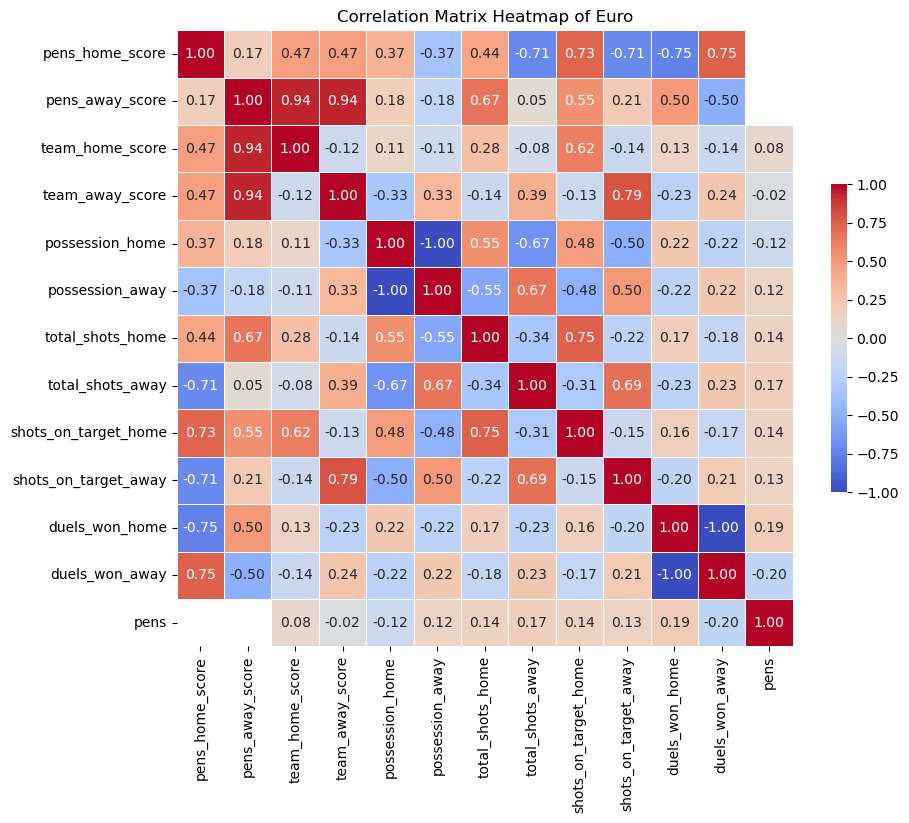

In [15]:
corr = euro_data_df_standardized.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix Heatmap of Euro')
plt.show()

In [16]:
euro_data_df.columns

Index(['stage', 'date', 'pens', 'pens_home_score', 'pens_away_score',
       'team_name_home', 'team_name_away', 'team_home_score',
       'team_away_score', 'possession_home', 'possession_away',
       'total_shots_home', 'total_shots_away', 'shots_on_target_home',
       'shots_on_target_away', 'duels_won_home', 'duels_won_away',
       'events_list', 'lineup_home', 'lineup_away', 'outcome_home',
       'outcome_away'],
      dtype='object')

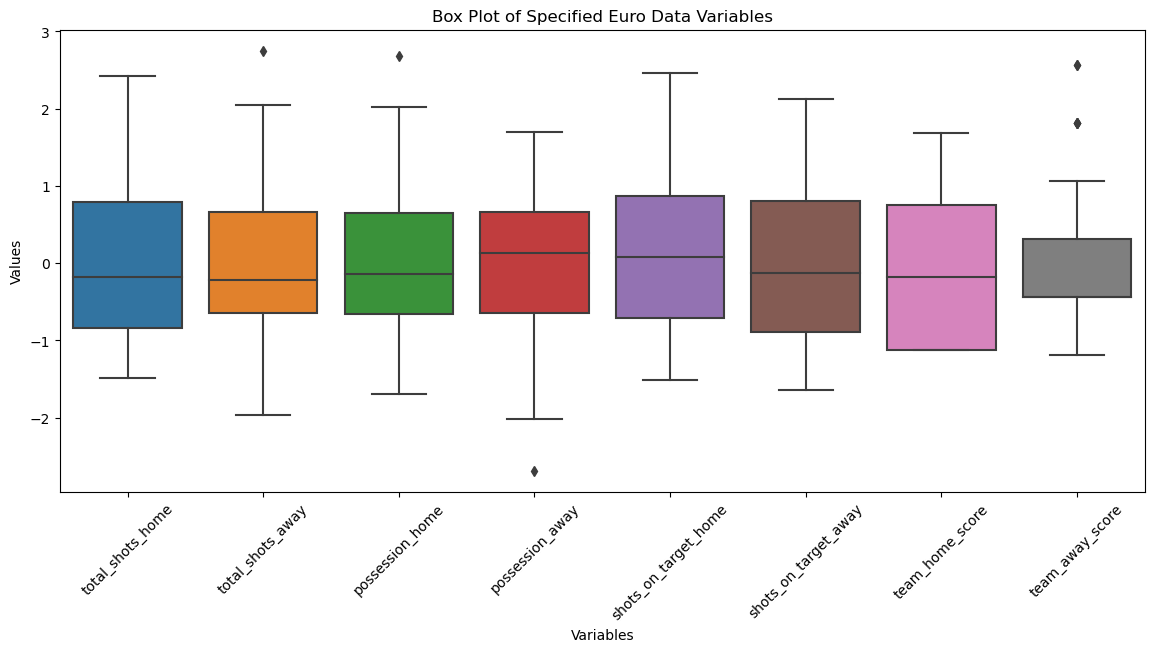

In [17]:
specified_columns = [
    'total_shots_home', 'total_shots_away', 'possession_home', 'possession_away',
    'shots_on_target_home', 'shots_on_target_away', 'team_home_score', 'team_away_score'
]
euro_data_df_filtered = euro_data_df_standardized[specified_columns]
melted_df_filtered = euro_data_df_filtered.melt(var_name='Variables', value_name='Values')
plt.figure(figsize=(14, 6))
sns.boxplot(x='Variables', y='Values', data=melted_df_filtered)
plt.xticks(rotation=45)
plt.title('Box Plot of Specified Euro Data Variables')
plt.show()

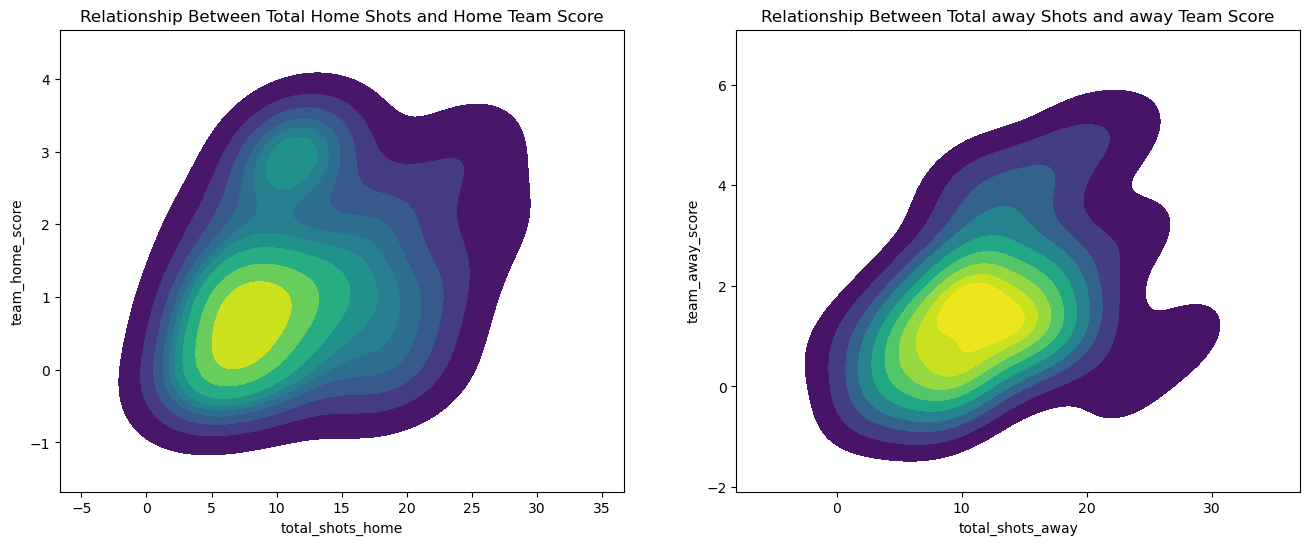

In [18]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.kdeplot(data=euro_data_df, x='total_shots_home', y='team_home_score', fill=True, cmap='viridis', ax=axs[0])
axs[0].set_title('Relationship Between Total Home Shots and Home Team Score')
sns.kdeplot(data=euro_data_df, x='total_shots_away', y='team_away_score', fill=True, cmap='viridis', ax=axs[1])
axs[1].set_title('Relationship Between Total away Shots and away Team Score')
plt.show()

In [19]:
euro_data_df.columns

Index(['stage', 'date', 'pens', 'pens_home_score', 'pens_away_score',
       'team_name_home', 'team_name_away', 'team_home_score',
       'team_away_score', 'possession_home', 'possession_away',
       'total_shots_home', 'total_shots_away', 'shots_on_target_home',
       'shots_on_target_away', 'duels_won_home', 'duels_won_away',
       'events_list', 'lineup_home', 'lineup_away', 'outcome_home',
       'outcome_away'],
      dtype='object')

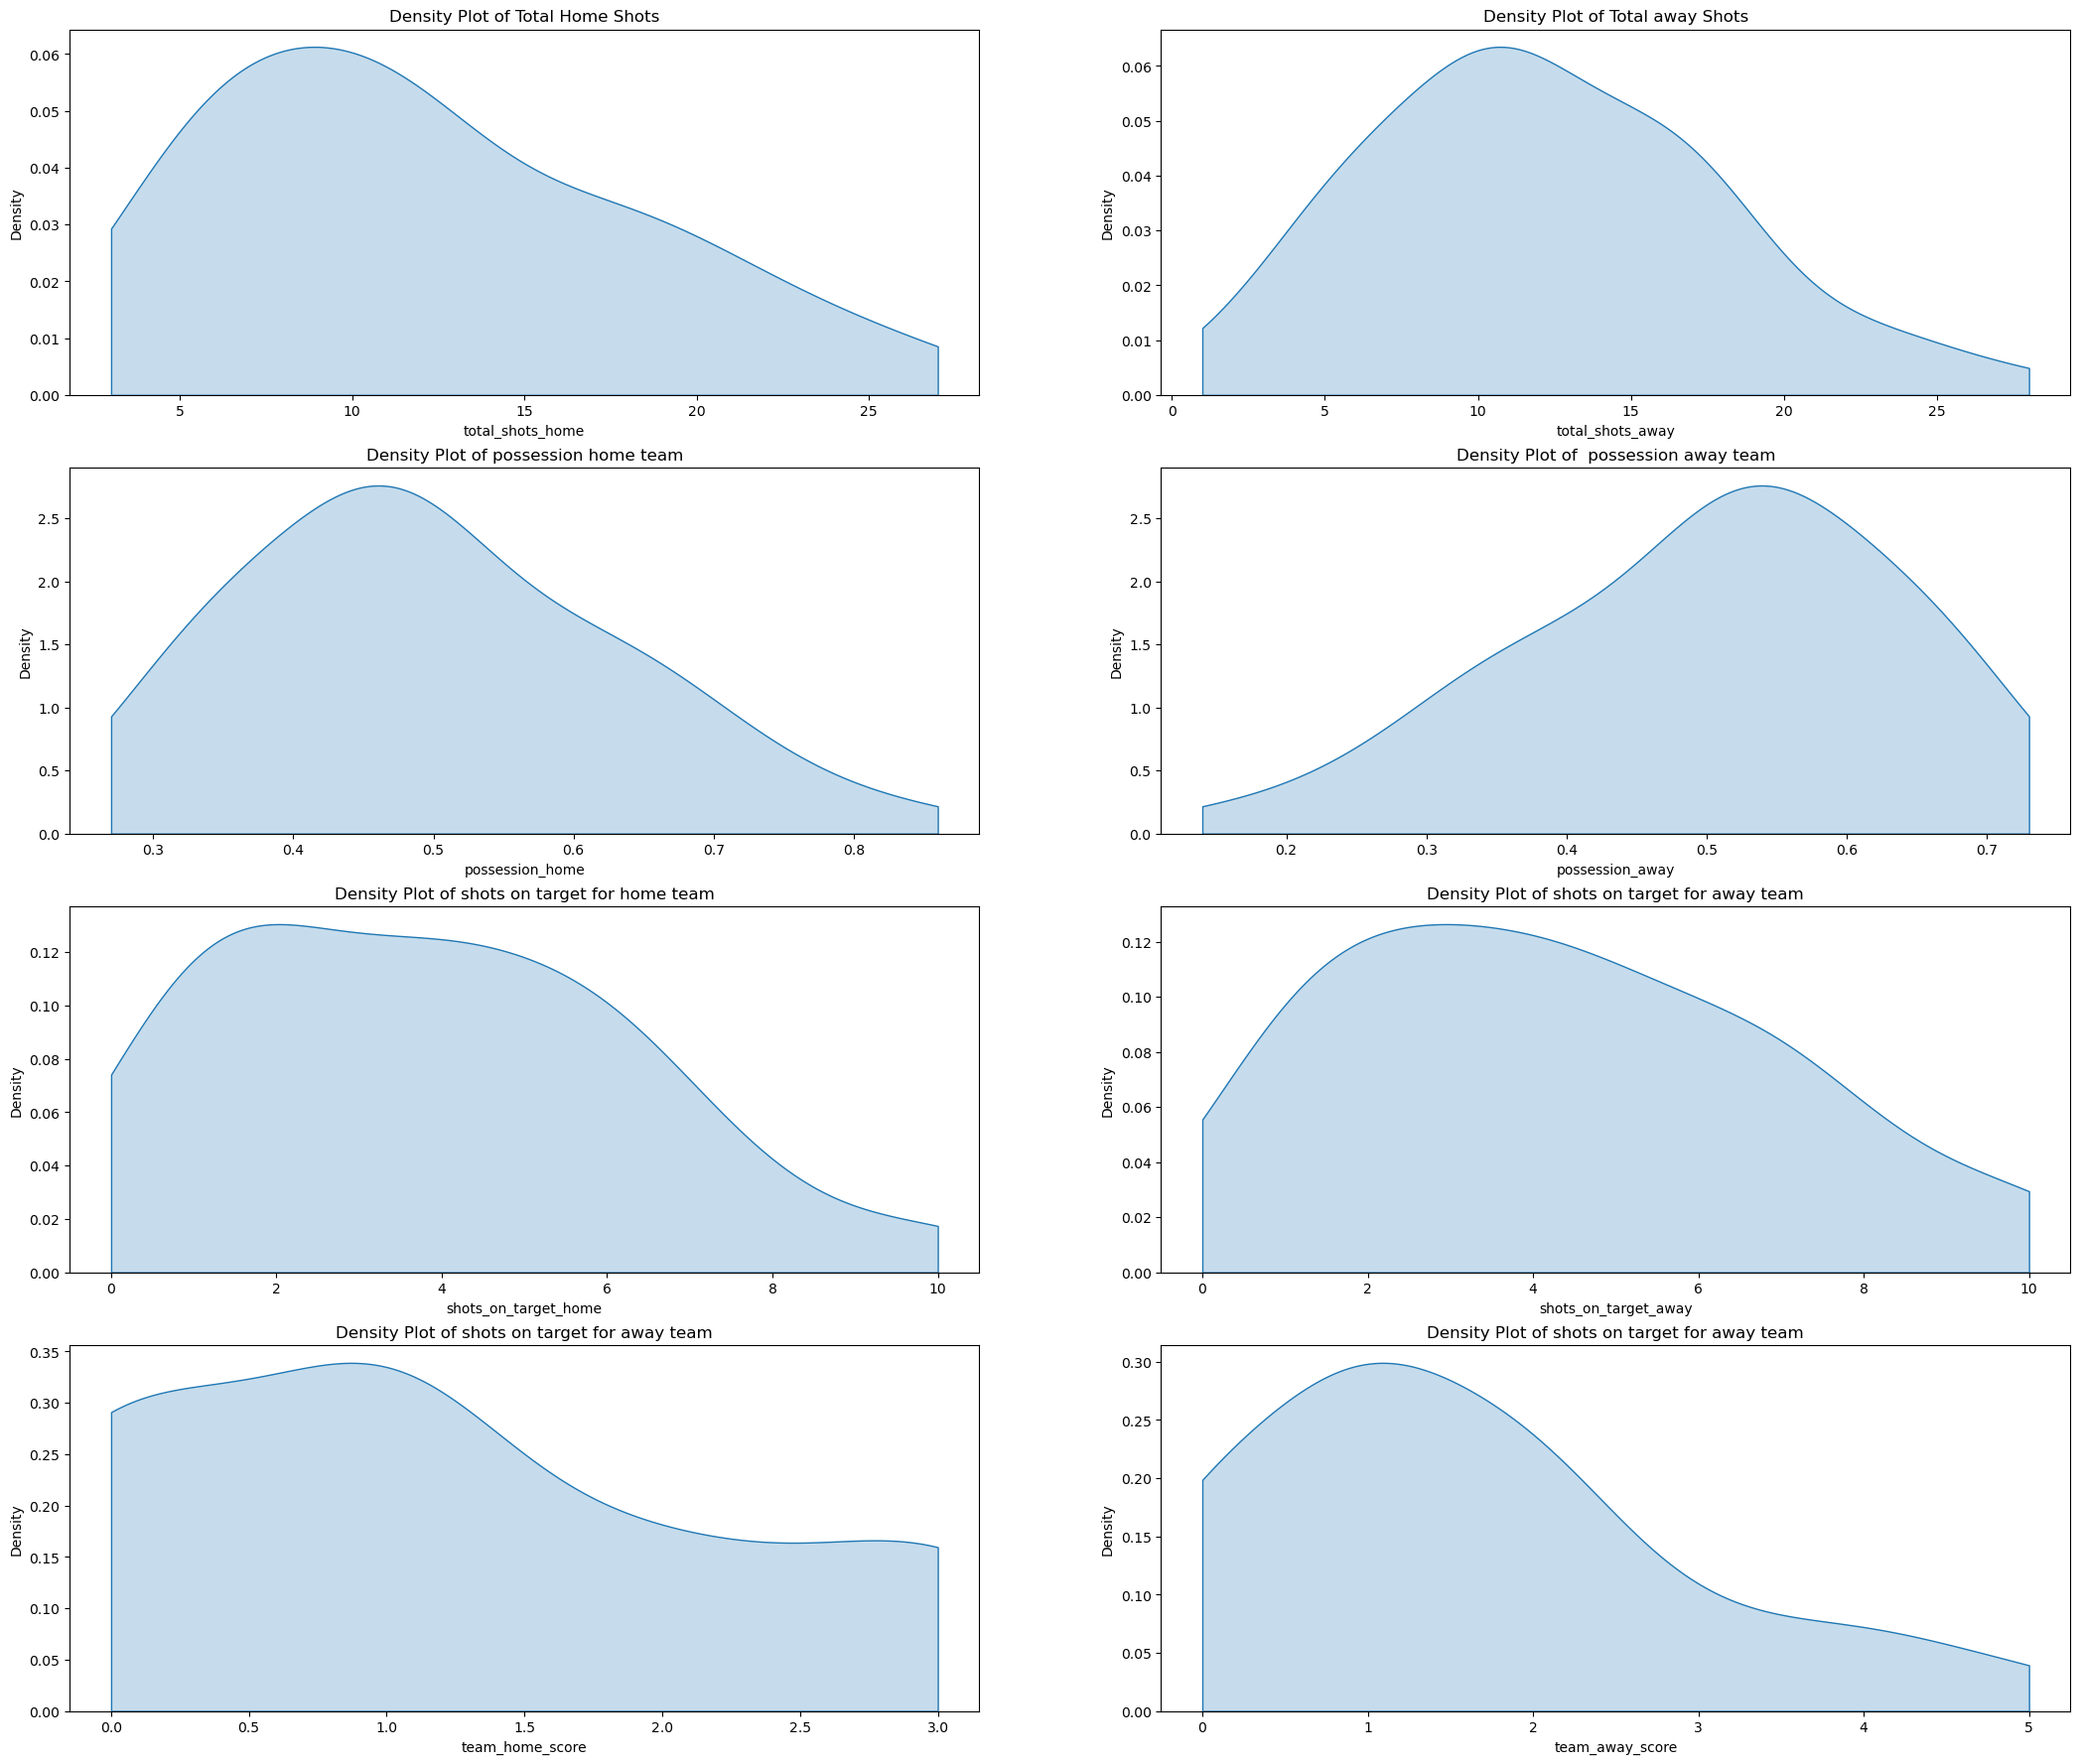

In [20]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(26, 22))
sns.kdeplot(euro_data_df['total_shots_home'], fill=True, ax=axs[0, 0], cut=0)
axs[0, 0].set_title('Density Plot of Total Home Shots')
sns.kdeplot(euro_data_df['total_shots_away'], fill=True, ax=axs[0, 1], cut=0)
axs[0, 1].set_title('Density Plot of Total away Shots')
sns.kdeplot(euro_data_df['possession_home'], fill=True, ax=axs[1, 0], cut=0)
axs[1, 0].set_title('Density Plot of possession home team')
sns.kdeplot(euro_data_df['possession_away'], fill=True, ax=axs[1, 1], cut=0)
axs[1, 1].set_title('Density Plot of  possession away team')
sns.kdeplot(euro_data_df['shots_on_target_home'], fill=True, ax=axs[2, 0], cut=0)
axs[2, 0].set_title('Density Plot of shots on target for home team')
sns.kdeplot(euro_data_df['shots_on_target_away'], fill=True, ax=axs[2, 1], cut=0)
axs[2, 1].set_title('Density Plot of shots on target for away team')
sns.kdeplot(euro_data_df['team_home_score'], fill=True, ax=axs[3, 0], cut=0)
axs[3, 0].set_title('Density Plot of shots on target for away team')
sns.kdeplot(euro_data_df['team_away_score'], fill=True, ax=axs[3, 1], cut=0)
axs[3, 1].set_title('Density Plot of shots on target for away team')
plt.show()

In [21]:
euro_data_df.columns

Index(['stage', 'date', 'pens', 'pens_home_score', 'pens_away_score',
       'team_name_home', 'team_name_away', 'team_home_score',
       'team_away_score', 'possession_home', 'possession_away',
       'total_shots_home', 'total_shots_away', 'shots_on_target_home',
       'shots_on_target_away', 'duels_won_home', 'duels_won_away',
       'events_list', 'lineup_home', 'lineup_away', 'outcome_home',
       'outcome_away'],
      dtype='object')

In [22]:
euro_home_df = euro_data_df[['team_name_home', 'team_home_score', 'possession_home', 'total_shots_home', 'shots_on_target_home', 'outcome_home']]
euro_away_df = euro_data_df[['team_name_away', 'team_away_score', 'possession_away', 'total_shots_away', 'shots_on_target_away', 'outcome_away']]

In [23]:
euro_home_df.shape

(51, 6)

In [24]:
euro_away_df.shape

(51, 6)

In [25]:
euro_data_df.tail(30)

,stage,date,pens,pens_home_score,pens_away_score,team_name_home,team_name_away,team_home_score,team_away_score,possession_home,...,total_shots_away,shots_on_target_home,shots_on_target_away,duels_won_home,duels_won_away,events_list,lineup_home,lineup_away,outcome_home,outcome_away
21,Group stage: Matchday 3,21.06.2021,False,NaN,NaN,Finland,Belgium,0,2,0.39,...,17,1,7,0.40,0.61,"[{'event_team': 'home', 'event_time': "" 59' "",...","[{'Player_Name': 'Pohjanpalo', 'Player_Number'...","[{'Player_Name': 'Lukaku', 'Player_Number': '9...",0,1
22,Group stage: Matchday 3,21.06.2021,False,NaN,NaN,Russia,Denmark,1,4,0.35,...,16,2,10,0.59,0.41,"[{'event_team': 'home', 'event_time': "" 28' "",...","[{'Player_Name': 'Dzyuba', 'Player_Number': '2...","[{'Player_Name': 'Poulsen', 'Player_Number': '...",0,1
23,Group stage: Matchday 3,21.06.2021,False,NaN,NaN,Ukraine,Austria,0,1,0.51,...,18,1,4,0.43,0.57,"[{'event_team': 'away', 'event_time': "" 21' "",...","[{'Player_Name': 'Malinovskyi', 'Player_Number...","[{'Player_Name': 'Arnautovic', 'Player_Number'...",0,1
24,Group stage: Matchday 3,21.06.2021,False,NaN,NaN,North Macedonia,Netherlands,0,3,0.41,...,17,1,7,0.39,0.61,"[{'event_team': 'home', 'event_time': "" 18' "",...","[{'Player_Name': 'Pandev', 'Player_Number': '1...","[{'Player_Name': 'Malen', 'Player_Number': '18...",0,1
25,Group stage: Matchday 3,20.06.2021,False,NaN,NaN,Italy,Wales,1,0,0.70,...,3,6,1,0.56,0.44,"[{'event_team': 'home', 'event_time': "" 39' "",...","[{'Player_Name': 'Chiesa', 'Player_Number': '1...","[{'Player_Name': 'James', 'Player_Number': '20...",1,0
26,Group stage: Matchday 3,20.06.2021,False,NaN,NaN,Switzerland,Turkey,3,1,0.51,...,19,10,6,0.53,0.47,"[{'event_team': 'home', 'event_time': "" 6' "", ...","[{'Player_Name': 'Embolo', 'Player_Number': '7...","[{'Player_Name': 'Yilmaz', 'Player_Number': '1...",1,0
27,Group stage: Matchday 2,19.06.2021,False,NaN,NaN,Spain,Poland,1,1,0.77,...,5,5,2,0.42,0.58,"[{'event_team': 'home', 'event_time': "" 25' "",...","[{'Player_Name': 'Olmo Carvajal', 'Player_Numb...","[{'Player_Name': 'Lewandowski', 'Player_Number...",2,2
28,Group stage: Matchday 2,19.06.2021,False,NaN,NaN,Portugal,Germany,2,4,0.42,...,12,2,7,0.55,0.45,"[{'event_team': 'home', 'event_time': "" 15' "",...","[{'Player_Name': 'Ronaldo', 'Player_Number': '...","[{'Player_Name': 'Gnabry', 'Player_Number': '1...",0,1
29,Group stage: Matchday 2,19.06.2021,False,NaN,NaN,Hungary,France,1,1,0.33,...,15,3,4,0.40,0.60,"[{'event_team': 'away', 'event_time': "" 10' "",...","[{'Player_Name': 'Szalai', 'Player_Number': '9...","[{'Player_Name': 'Mbappe', 'Player_Number': '1...",2,2
30,Group stage: Matchday 2,18.06.2021,False,NaN,NaN,England,Scotland,0,0,0.61,...,11,1,2,0.54,0.46,"[{'event_team': 'away', 'event_time': "" 15' "",...","[{'Player_Name': 'Sterling', 'Player_Number': ...","[{'Player_Name': 'Dykes', 'Player_Number': '9'...",2,2


In [26]:
worldCup_data = 'data/Fifa_world_cup_matches.csv'
worldCup_data = pd.read_csv(worldCup_data)

# world cup EDA:

In [27]:
worldCup_data.head()

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
0,QATAR,ECUADOR,42%,50%,8%,0,2,20 NOV 2022,17 : 00,Group A,...,0,1,6,5,0,0,52,72,256,279
1,ENGLAND,IRAN,72%,19%,9%,6,2,21 NOV 2022,14 : 00,Group B,...,0,1,8,13,0,0,63,72,139,416
2,SENEGAL,NETHERLANDS,44%,45%,11%,0,2,21 NOV 2022,17 : 00,Group A,...,0,0,9,15,0,0,63,73,263,251
3,UNITED STATES,WALES,51%,39%,10%,1,1,21 NOV 2022,20 : 00,Group B,...,0,1,7,7,0,0,81,72,242,292
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,1,2,22 NOV 2022,11 : 00,Group C,...,1,0,4,14,0,0,65,80,163,361


In [28]:
Del_columns = ['hour', 'assists team1', 'left channel team1'
               , 'left inside channel team1', 'central channel team1', 'right inside channel team1' 
               , 'right channel team1', 'total offers to receive team1', 'inbehind offers to receive team1', 'inbetween offers to receive team1', 'infront offers to receive team1'
               , 'receptions between midfield and defensive lines team1', 'attempted line breaks team1', 'completed line breaksteam1', 'attempted defensive line breaks team1'
               , 'completed defensive line breaksteam1', 'switches of play completed team1', 'goal preventions team1', 'own goals team1', 'forced turnovers team1', 'defensive pressures applied team1'
               , 'assists team2', 'left channel team2'
               , 'left inside channel team2', 'central channel team2', 'right inside channel team2' 
               , 'right channel team2', 'total offers to receive team2', 'inbehind offers to receive team2', 'inbetween offers to receive team2', 'infront offers to receive team2'
               , 'receptions between midfield and defensive lines team2', 'attempted line breaks team2', 'completed line breaks team2', 'attempted defensive line breaks team2'
               , 'completed defensive line breaks team2', 'switches of play completed team2', 'goal preventions team2', 'own goals team2', 'forced turnovers team2', 'defensive pressures applied team2'
               , 'red cards team1', 'red cards team2'
               , 'crosses completed team1', 'corners team1', 'goal inside the penalty area team1', 'goal outside the penalty area team1', 'off target attempts team1'
               , 'attempts inside the penalty area team1', 'attempts outside the penalty area  team1',  'offsides team1', 'crosses team1'
               , 'crosses completed team2', 'corners team2','goal inside the penalty area team2', 'goal outside the penalty area team2', 'off target attempts team2'
               , 'attempts inside the penalty area  team2', 'attempts outside the penalty area  team2',  'offsides team2', 'crosses team2',
]
worldCup_data = worldCup_data.drop(columns=[col for col in Del_columns if col in worldCup_data.columns])

In [29]:
worldCup_data.describe()

,number of goals team1,number of goals team2,total attempts team1,total attempts team2,conceded team1,conceded team2,on target attempts team1,on target attempts team2,yellow cards team1,yellow cards team2,fouls against team1,fouls against team2,passes team1,passes team2,passes completed team1,passes completed team2,free kicks team1,free kicks team2,penalties scored team1,penalties scored team2
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.0000,64.000000,64.000000,64.000000,64.000000,64.000000
mean,1.578125,1.109375,11.140625,11.281250,1.109375,1.578125,4.203125,3.750000,1.781250,1.750000,12.640625,12.359375,509.515625,492.109375,437.0000,419.890625,14.093750,14.390625,0.140625,0.125000
std,1.551289,1.055856,4.972519,5.807682,1.055856,1.551289,2.527184,2.713868,1.740906,1.511858,5.247425,3.789573,156.348511,166.213681,156.9237,165.710028,4.219075,5.202616,0.350382,0.377964
min,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,5.000000,225.000000,224.000000,167.0000,154.000000,6.000000,5.000000,0.000000,0.000000
25%,0.000000,0.000000,8.000000,7.750000,0.000000,0.000000,3.000000,2.000000,0.000000,1.000000,9.000000,10.000000,392.750000,392.250000,318.2500,317.500000,11.000000,11.000000,0.000000,0.000000
50%,1.000000,1.000000,10.000000,10.000000,1.000000,1.000000,4.000000,3.000000,1.500000,2.000000,13.000000,12.000000,508.000000,466.000000,437.0000,396.500000,14.000000,14.500000,0.000000,0.000000
75%,2.000000,2.000000,14.000000,14.000000,2.000000,2.000000,6.000000,5.000000,3.000000,2.000000,15.000000,14.250000,594.500000,571.000000,523.0000,498.250000,16.000000,17.000000,0.000000,0.000000
max,7.000000,4.000000,25.000000,32.000000,4.000000,7.000000,10.000000,13.000000,8.000000,8.000000,30.000000,24.000000,1061.000000,1070.000000,1003.0000,992.000000,27.000000,30.000000,1.000000,2.000000


In [30]:
worldCup_data[['possession team1', 'possession team2', 'possession in contest']] = worldCup_data[['possession team1', 'possession team2', 'possession in contest']].apply(lambda x: x.str.strip().str.rstrip('%').astype(float) / 100)

In [31]:
worldCup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   team1                     64 non-null     object 
 1   team2                     64 non-null     object 
 2   possession team1          64 non-null     float64
 3   possession team2          64 non-null     float64
 4   possession in contest     64 non-null     float64
 5   number of goals team1     64 non-null     int64  
 6   number of goals team2     64 non-null     int64  
 7   date                      64 non-null     object 
 8   category                  64 non-null     object 
 9   total attempts team1      64 non-null     int64  
 10  total attempts team2      64 non-null     int64  
 11  conceded team1            64 non-null     int64  
 12  conceded team2            64 non-null     int64  
 13  on target attempts team1  64 non-null     int64  
 14  on target at

# Calculation of the win, lose, and draw

In [32]:
worldCup_data['outcome_team1'] = None
worldCup_data['outcome_team2'] = None


for index, row in worldCup_data.iterrows():
    if row['number of goals team1'] > row['number of goals team2']:
        worldCup_data.at[index, 'outcome_team1'] = 1  
        worldCup_data.at[index, 'outcome_team2'] = 0  
    elif row['number of goals team1'] < row['number of goals team2']:
        worldCup_data.at[index, 'outcome_team1'] = 0  
        worldCup_data.at[index, 'outcome_team2'] = 1  
    else:
        worldCup_data.at[index, 'outcome_team1'] = 2  
        worldCup_data.at[index, 'outcome_team2'] = 2    


In [33]:
worldCup_data.columns

Index(['team1', 'team2', 'possession team1', 'possession team2',
       'possession in contest', 'number of goals team1',
       'number of goals team2', 'date', 'category', 'total attempts team1',
       'total attempts team2', 'conceded team1', 'conceded team2',
       'on target attempts team1', 'on target attempts team2',
       'yellow cards team1', 'yellow cards team2', 'fouls against team1',
       'fouls against team2', 'passes team1', 'passes team2',
       'passes completed team1', 'passes completed team2', 'free kicks team1',
       'free kicks team2', 'penalties scored team1', 'penalties scored team2',
       'outcome_team1', 'outcome_team2'],
      dtype='object')

In [34]:
filtered_data = worldCup_data[worldCup_data['number of goals team1'] == worldCup_data['number of goals team2']]

filtered_data

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,category,total attempts team1,...,passes team1,passes team2,passes completed team1,passes completed team2,free kicks team1,free kicks team2,penalties scored team1,penalties scored team2,outcome_team1,outcome_team2
3,UNITED STATES,WALES,0.51,0.39,0.10,1,1,21 NOV 2022,Group B,6,...,569,409,509,321,11,15,0,1,2,2
5,DENMARK,TUNISIA,0.55,0.33,0.12,0,0,22 NOV 2022,Group D,11,...,594,387,523,302,11,10,0,0,2,2
6,MEXICO,POLAND,0.54,0.31,0.15,0,0,22 NOV 2022,Group C,13,...,485,322,422,241,16,16,0,0,2,2
8,MOROCCO,CROATIA,0.32,0.57,0.12,0,0,23 NOV 2022,Group F,8,...,360,667,290,592,12,17,0,0,2,2
13,URUGUAY,KOREA REPUBLIC,0.49,0.38,0.13,0,0,24 NOV 2022,Group H,10,...,528,419,459,340,10,8,0,0,2,2
18,NETHERLANDS,ECUADOR,0.48,0.39,0.13,1,1,25 NOV 2022,Group A,2,...,524,425,451,345,16,16,0,0,2,2
19,ENGLAND,UNITED STATES,0.51,0.40,0.09,0,0,25 NOV 2022,Group B,8,...,550,427,488,368,15,10,0,0,2,2
27,SPAIN,GERMANY,0.56,0.33,0.11,1,1,27 NOV 2022,Group E,7,...,647,352,565,281,16,15,0,0,2,2
28,CAMEROON,SERBIA,0.38,0.49,0.13,3,3,28 NOV 2022,Group G,13,...,364,513,271,433,17,8,0,0,2,2
40,CROATIA,BELGIUM,0.43,0.47,0.10,0,0,01 DEC 2022,Group F,11,...,578,596,504,531,9,11,0,0,2,2


## manual modification of the outcome

In [35]:
worldCup_data.loc[[52, 54, 56, 63], 'team_1_win'] = [1, 1, 1, 1]
worldCup_data.loc[[57], 'team_2_win'] = [1]

In [36]:
Del_columns = ['possession in contest', 'yellow cards team1', 'yellow cards team2' , 'fouls against team1', 'fouls against team2', 'conceded team1', 'conceded team2', 'penalties scored team1', 'penalties scored team2'
              , 'free kicks team1', 'free kicks team2', 'passes completed team1', 'passes completed team2']
worldCup_data = worldCup_data.drop(columns=[col for col in Del_columns if col in worldCup_data.columns])

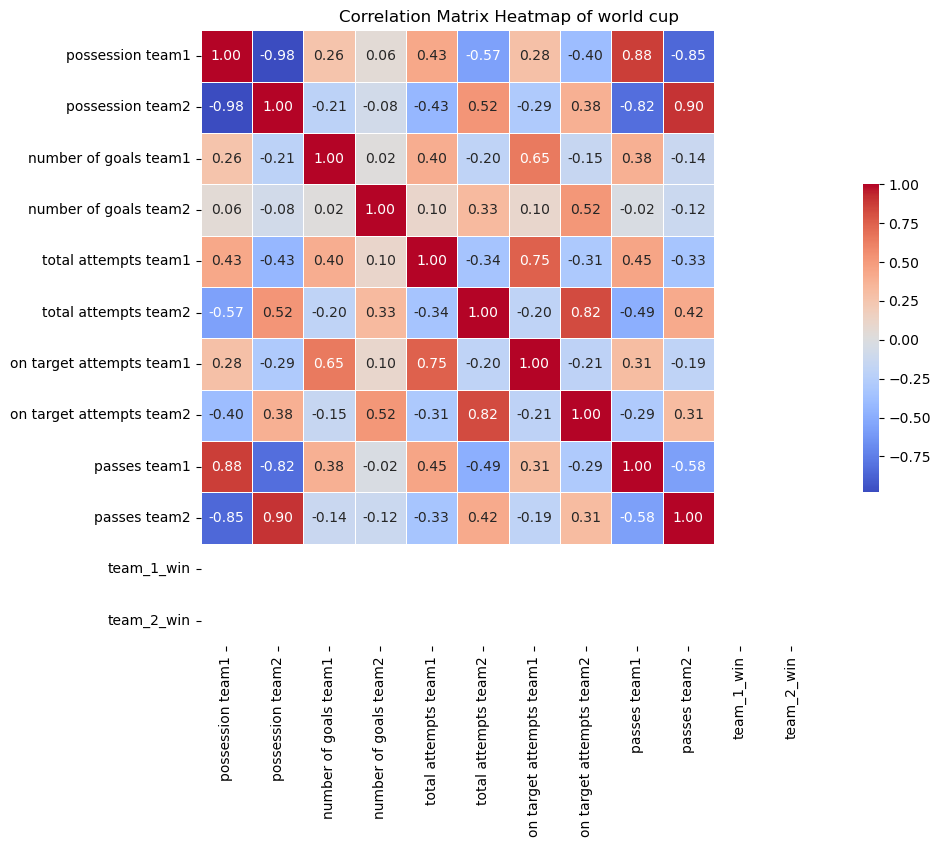

In [37]:
corr = worldCup_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix Heatmap of world cup')
plt.show()

In [38]:
scaler = StandardScaler()
worldCup_data_numeric = worldCup_data.select_dtypes(include=['number'])


worldCup_data_numeric_stand = pd.DataFrame(scaler.fit_transform(worldCup_data_numeric), columns=worldCup_data_numeric.columns)
worldCup_data_standardized = pd.concat([worldCup_data_numeric_stand, worldCup_data.select_dtypes(exclude=['number'])], axis=1)

In [39]:
worldCup_data_standardized.head()

,possession team1,possession team2,number of goals team1,number of goals team2,total attempts team1,total attempts team2,on target attempts team1,on target attempts team2,passes team1,passes team2,team_1_win,team_2_win,team1,team2,date,category,outcome_team1,outcome_team2
0,-0.222014,0.543986,-1.025341,0.850178,-1.244675,-0.916545,-1.676313,-0.278543,-0.383669,-0.073430,NaN,NaN,QATAR,ECUADOR,20 NOV 2022,Group A,0,1
1,2.315290,-2.062941,2.872985,0.850178,0.376886,-0.569451,1.115465,-0.278543,1.930635,-1.625792,NaN,NaN,ENGLAND,IRAN,21 NOV 2022,Group B,1,0
2,-0.052861,0.123514,-1.025341,0.850178,0.579581,-0.395904,-0.479837,-0.278543,-0.815587,-0.328115,NaN,NaN,SENEGAL,NETHERLANDS,21 NOV 2022,Group A,0,1
3,0.539177,-0.381053,-0.375620,-0.104408,-1.041980,-0.742998,-1.277488,-0.278543,0.383468,-0.503968,NaN,NaN,UNITED STATES,WALES,21 NOV 2022,Group B,2,2
4,1.638676,-1.642469,-0.375620,0.850178,0.579581,-1.437185,0.716640,-0.649934,0.647775,-1.365044,NaN,NaN,ARGENTINA,SAUDI ARABIA,22 NOV 2022,Group C,0,1


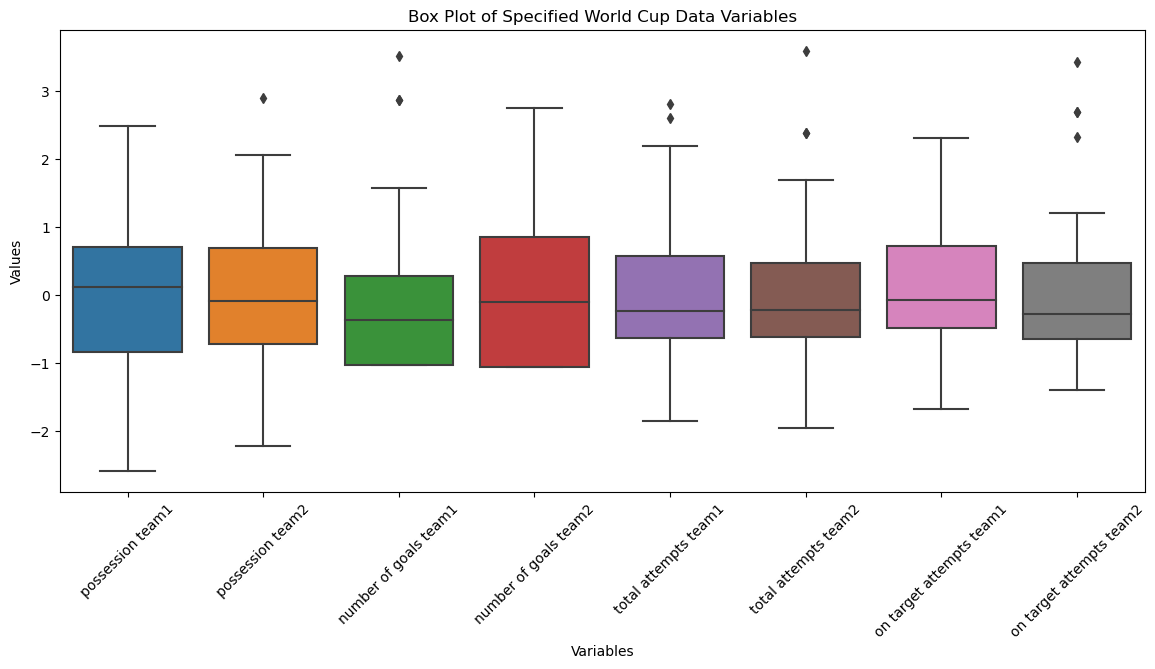

In [40]:
specified_columns = [
    'possession team1', 'possession team2', 'number of goals team1', 'number of goals team2',
    'total attempts team1', 'total attempts team2', 'on target attempts team1', 'on target attempts team2', 
]
worldCup_data_filtered = worldCup_data_standardized[specified_columns]
melted_df_filtered = worldCup_data_filtered.melt(var_name='Variables', value_name='Values')
plt.figure(figsize=(14, 6))
sns.boxplot(x='Variables', y='Values', data=melted_df_filtered)
plt.xticks(rotation=45)
plt.title('Box Plot of Specified World Cup Data Variables')
plt.show()

Text(0.5, 1.0, 'Density plot of the on target attempts of team 2')

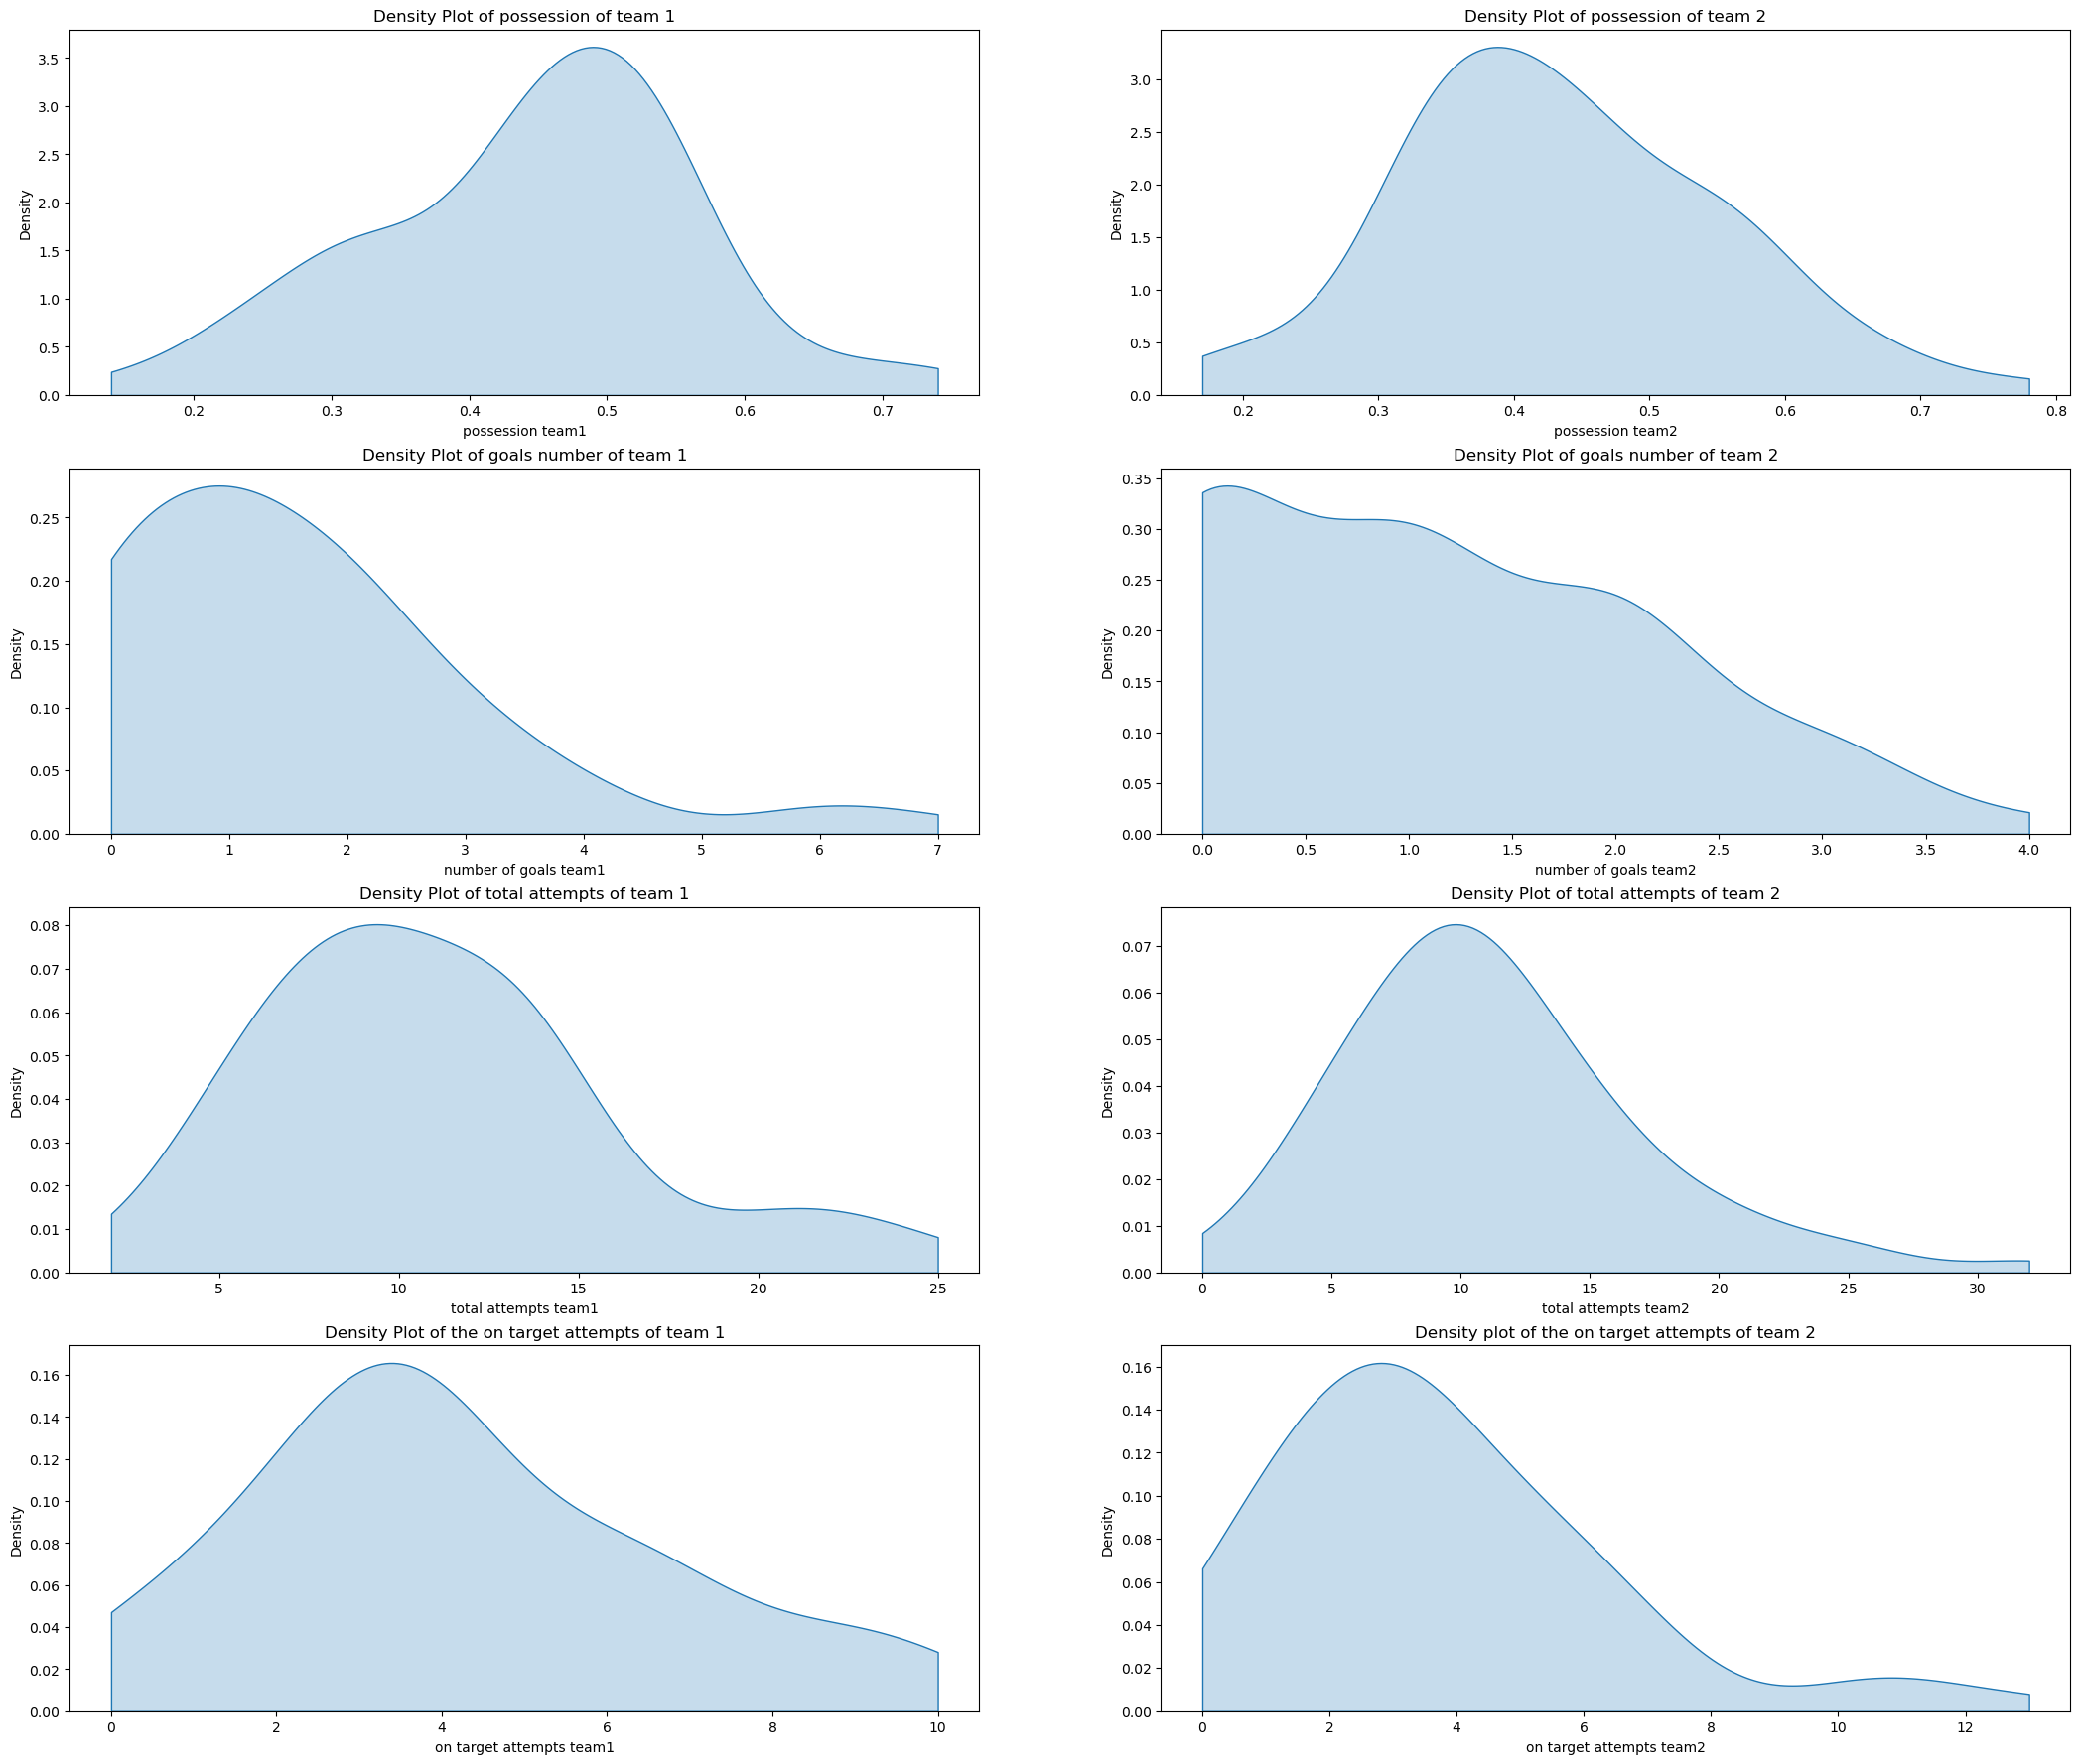

In [41]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(26, 22))
sns.kdeplot(worldCup_data['possession team1'], fill=True, ax=axs[0, 0], cut=0)
axs[0, 0].set_title('Density Plot of possession of team 1')
sns.kdeplot(worldCup_data['possession team2'], fill=True, ax=axs[0, 1], cut=0)
axs[0, 1].set_title('Density Plot of possession of team 2')
sns.kdeplot(worldCup_data['number of goals team1'], fill=True, ax=axs[1, 0], cut=0)
axs[1, 0].set_title('Density Plot of goals number of team 1')
sns.kdeplot(worldCup_data['number of goals team2'], fill=True, ax=axs[1, 1], cut=0)
axs[1, 1].set_title('Density Plot of goals number of team 2')
sns.kdeplot(worldCup_data['total attempts team1'], fill=True, ax=axs[2, 0], cut=0)
axs[2, 0].set_title('Density Plot of total attempts of team 1')
sns.kdeplot(worldCup_data['total attempts team2'], fill=True, ax=axs[2, 1], cut=0)
axs[2, 1].set_title('Density Plot of total attempts of team 2')
sns.kdeplot(worldCup_data['on target attempts team1'], fill=True, ax=axs[3, 0], cut=0)
axs[3, 0].set_title('Density Plot of the on target attempts of team 1')
sns.kdeplot(worldCup_data['on target attempts team2'], fill=True, ax=axs[3, 1], cut=0)
axs[3, 1].set_title('Density plot of the on target attempts of team 2')

In [42]:
worldCup_data.columns

Index(['team1', 'team2', 'possession team1', 'possession team2',
       'number of goals team1', 'number of goals team2', 'date', 'category',
       'total attempts team1', 'total attempts team2',
       'on target attempts team1', 'on target attempts team2', 'passes team1',
       'passes team2', 'outcome_team1', 'outcome_team2', 'team_1_win',
       'team_2_win'],
      dtype='object')

In [43]:
import scipy.stats as stats

t_stat, p_value = stats.ttest_rel(worldCup_data['possession team1'], worldCup_data['possession team2'])

In [44]:
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 0.3678857004172272, P-value: 0.714191603590443


In [45]:
worldCup_data.columns

Index(['team1', 'team2', 'possession team1', 'possession team2',
       'number of goals team1', 'number of goals team2', 'date', 'category',
       'total attempts team1', 'total attempts team2',
       'on target attempts team1', 'on target attempts team2', 'passes team1',
       'passes team2', 'outcome_team1', 'outcome_team2', 'team_1_win',
       'team_2_win'],
      dtype='object')

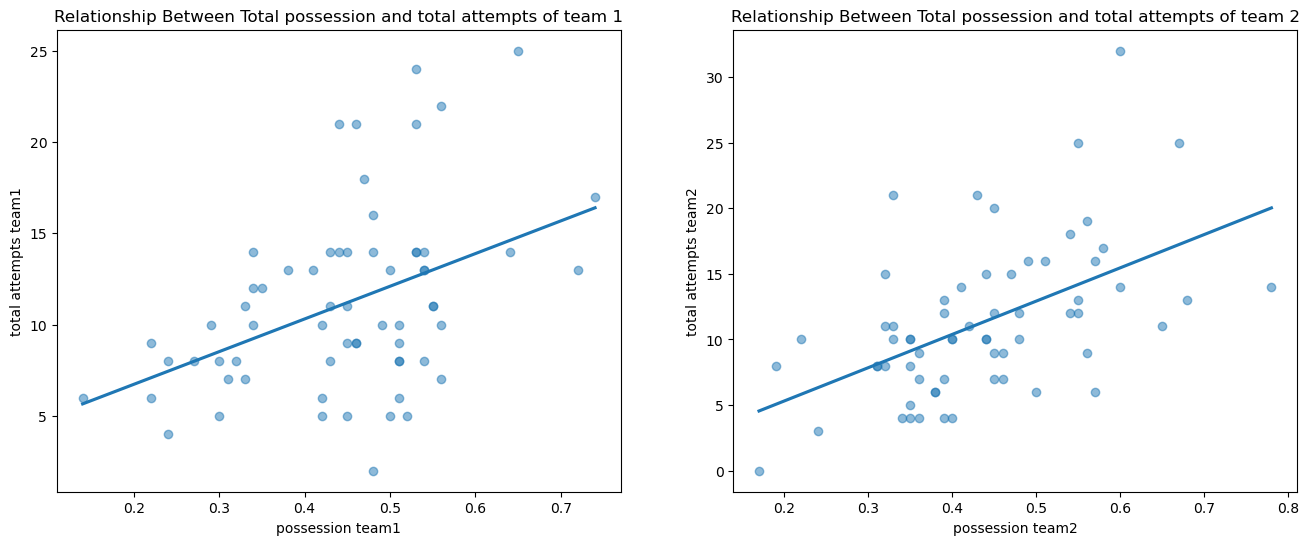

In [46]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.regplot(x='possession team1', y='total attempts team1', data=worldCup_data, ci=None, scatter_kws={'alpha':0.5}, ax=axs[0])
axs[0].set_title('Relationship Between Total possession and total attempts of team 1')
sns.regplot(x='possession team2', y='total attempts team2', data=worldCup_data, ci=None, scatter_kws={'alpha':0.5}, ax=axs[1])
axs[1].set_title('Relationship Between Total possession and total attempts of team 2')
plt.show()

In [47]:
worldCup_data.columns

Index(['team1', 'team2', 'possession team1', 'possession team2',
       'number of goals team1', 'number of goals team2', 'date', 'category',
       'total attempts team1', 'total attempts team2',
       'on target attempts team1', 'on target attempts team2', 'passes team1',
       'passes team2', 'outcome_team1', 'outcome_team2', 'team_1_win',
       'team_2_win'],
      dtype='object')

In [48]:
worldcup_home_df = worldCup_data[['team1', 'possession team1', 'number of goals team1', 'total attempts team1', 'on target attempts team1', 'outcome_team1']]
worldcup_away_df = worldCup_data[['team2', 'possession team2', 'number of goals team2', 'total attempts team2', 'on target attempts team2', 'outcome_team2']]

In [49]:
worldcup_home_df.shape

(64, 6)

In [50]:
worldcup_away_df.shape

(64, 6)

In [51]:
worldCup_data.head(50)

,team1,team2,possession team1,possession team2,number of goals team1,number of goals team2,date,category,total attempts team1,total attempts team2,on target attempts team1,on target attempts team2,passes team1,passes team2,outcome_team1,outcome_team2,team_1_win,team_2_win
0,QATAR,ECUADOR,0.42,0.50,0,2,20 NOV 2022,Group A,5,6,0,3,450,480,0,1,NaN,NaN
1,ENGLAND,IRAN,0.72,0.19,6,2,21 NOV 2022,Group B,13,8,7,3,809,224,1,0,NaN,NaN
2,SENEGAL,NETHERLANDS,0.44,0.45,0,2,21 NOV 2022,Group A,14,9,3,3,383,438,0,1,NaN,NaN
3,UNITED STATES,WALES,0.51,0.39,1,1,21 NOV 2022,Group B,6,7,1,3,569,409,2,2,NaN,NaN
4,ARGENTINA,SAUDI ARABIA,0.64,0.24,1,2,22 NOV 2022,Group C,14,3,6,2,610,267,0,1,NaN,NaN
5,DENMARK,TUNISIA,0.55,0.33,0,0,22 NOV 2022,Group D,11,11,4,1,594,387,2,2,NaN,NaN
6,MEXICO,POLAND,0.54,0.31,0,0,22 NOV 2022,Group C,13,8,4,1,485,322,2,2,NaN,NaN
7,FRANCE,AUSTRALIA,0.56,0.35,4,1,22 NOV 2022,Group D,22,4,7,1,734,466,1,0,NaN,NaN
8,MOROCCO,CROATIA,0.32,0.57,0,0,23 NOV 2022,Group F,8,6,2,2,360,667,2,2,NaN,NaN
9,GERMANY,JAPAN,0.65,0.22,1,2,23 NOV 2022,Group E,25,10,9,3,820,261,0,1,NaN,NaN


In [52]:
copa_data = 'data/international-copa-america-matches-2021-to-2021-stats.csv'
copa_data_df = pd.read_csv(copa_data)
copa_data_df.head()

,timestamp,date_GMT,status,attendance,home_team_name,away_team_name,referee,Game Week,Pre-Match PPG (Home),Pre-Match PPG (Away),...,odds_ft_home_team_win,odds_ft_draw,odds_ft_away_team_win,odds_ft_over15,odds_ft_over25,odds_ft_over35,odds_ft_over45,odds_btts_yes,odds_btts_no,stadium_name
0,1623618000,Jun 13 2021 - 9:00pm,complete,0.0,Brazil,Venezuela,Esteban Ostojich,1.0,0.0,0.0,...,1.08,13.00,30.00,1.16,1.48,2.15,3.45,3.25,1.29,Estádio Nacional de Brasília (Brasília- Distri...
1,1623628800,Jun 14 2021 - 12:00am,complete,0.0,Colombia,Ecuador,Néstor Fabián Pitana,1.0,0.0,0.0,...,1.91,3.40,4.65,1.43,2.20,3.80,7.50,2.05,1.71,Arena Pantanal (Cuiabá- Mato Grosso)
2,1623704400,Jun 14 2021 - 9:00pm,complete,0.0,Argentina,Chile,Wilmar Alexander Roldán Pérez,1.0,0.0,0.0,...,1.67,3.65,6.00,1.45,2.30,4.15,8.25,2.30,1.54,Estádio Nilton Santos (Rio de Janeiro)
3,1623715200,Jun 15 2021 - 12:00am,complete,0.0,Paraguay,Bolivia,Diego Mirko Haro Sueldo,1.0,0.0,0.0,...,1.59,3.80,6.75,1.37,2.10,3.55,7.00,2.10,1.67,Estádio Olímpico Pedro Ludovico Teixeira (Goiâ...
4,1623963600,Jun 17 2021 - 9:00pm,complete,0.0,Colombia,Venezuela,Eber Aquino,2.0,3.0,0.0,...,1.38,4.70,10.00,1.41,2.15,3.90,7.75,2.70,1.40,Estádio Olímpico Pedro Ludovico Teixeira (Goiâ...


# copa america EDA

In [53]:
copa_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 66 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   timestamp                            28 non-null     int64  
 1   date_GMT                             28 non-null     object 
 2   status                               28 non-null     object 
 3   attendance                           27 non-null     float64
 4   home_team_name                       28 non-null     object 
 5   away_team_name                       28 non-null     object 
 6   referee                              28 non-null     object 
 7   Game Week                            20 non-null     float64
 8   Pre-Match PPG (Home)                 28 non-null     float64
 9   Pre-Match PPG (Away)                 28 non-null     float64
 10  home_ppg                             28 non-null     float64
 11  away_ppg                          

In [54]:
columns =  ['date_GMT', 'home_team_name', 'away_team_name', 'home_team_goal_count', 'away_team_goal_count', 'home_team_shots', 'away_team_shots', 'home_team_shots_on_target', 'away_team_shots_on_target', 'home_team_possession'
           ,'away_team_possession']
copa_data_df = copa_data_df[columns]

In [55]:
copa_data_df.describe()

,home_team_goal_count,away_team_goal_count,home_team_shots,away_team_shots,home_team_shots_on_target,away_team_shots_on_target,home_team_possession,away_team_possession
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,1.392857,0.928571,13.821429,10.107143,6.142857,4.142857,51.785714,48.250000
std,1.100144,1.086229,6.907074,4.771360,2.662695,2.863749,11.301777,11.335376
min,0.000000,0.000000,3.000000,3.000000,2.000000,0.000000,31.000000,22.000000
25%,1.000000,0.000000,8.750000,7.500000,4.000000,3.000000,43.000000,40.250000
50%,1.000000,1.000000,13.000000,9.500000,5.500000,4.000000,49.000000,51.000000
75%,2.000000,2.000000,18.250000,12.250000,7.250000,5.000000,59.750000,57.000000
max,4.000000,4.000000,35.000000,23.000000,12.000000,14.000000,78.000000,69.000000


In [56]:
copa_data_df.head(len(copa_data_df))

,date_GMT,home_team_name,away_team_name,home_team_goal_count,away_team_goal_count,home_team_shots,away_team_shots,home_team_shots_on_target,away_team_shots_on_target,home_team_possession,away_team_possession
0,Jun 13 2021 - 9:00pm,Brazil,Venezuela,3,0,19,4,8,2,62,38
1,Jun 14 2021 - 12:00am,Colombia,Ecuador,1,0,6,9,3,3,42,59
2,Jun 14 2021 - 9:00pm,Argentina,Chile,1,1,19,6,6,5,49,51
3,Jun 15 2021 - 12:00am,Paraguay,Bolivia,3,1,35,5,12,3,78,22
4,Jun 17 2021 - 9:00pm,Colombia,Venezuela,0,0,24,3,9,0,65,35
5,Jun 18 2021 - 12:00am,Brazil,Peru,4,0,18,8,10,3,55,45
6,Jun 18 2021 - 9:00pm,Chile,Bolivia,1,0,19,11,12,4,62,38
7,Jun 19 2021 - 12:00am,Argentina,Uruguay,1,0,10,5,7,0,45,55
8,Jun 20 2021 - 9:00pm,Venezuela,Ecuador,2,2,10,18,4,7,31,69
9,Jun 21 2021 - 12:00am,Colombia,Peru,1,2,13,11,5,4,59,41


In [57]:
copa_data_df.columns

Index(['date_GMT', 'home_team_name', 'away_team_name', 'home_team_goal_count',
       'away_team_goal_count', 'home_team_shots', 'away_team_shots',
       'home_team_shots_on_target', 'away_team_shots_on_target',
       'home_team_possession', 'away_team_possession'],
      dtype='object')

In [58]:
copa_data_df.head(6)

,date_GMT,home_team_name,away_team_name,home_team_goal_count,away_team_goal_count,home_team_shots,away_team_shots,home_team_shots_on_target,away_team_shots_on_target,home_team_possession,away_team_possession
0,Jun 13 2021 - 9:00pm,Brazil,Venezuela,3,0,19,4,8,2,62,38
1,Jun 14 2021 - 12:00am,Colombia,Ecuador,1,0,6,9,3,3,42,59
2,Jun 14 2021 - 9:00pm,Argentina,Chile,1,1,19,6,6,5,49,51
3,Jun 15 2021 - 12:00am,Paraguay,Bolivia,3,1,35,5,12,3,78,22
4,Jun 17 2021 - 9:00pm,Colombia,Venezuela,0,0,24,3,9,0,65,35
5,Jun 18 2021 - 12:00am,Brazil,Peru,4,0,18,8,10,3,55,45


# Calculation of the win, lose, and draw

In [59]:
copa_data_df['home_team_outcome'] = None
copa_data_df['away_team_outcome'] = None


for index, row in copa_data_df.iterrows():
    if row['home_team_goal_count'] > row['away_team_goal_count']:
        copa_data_df.at[index, 'home_team_outcome'] = 1  
        copa_data_df.at[index, 'away_team_outcome'] = 0  
    elif row['home_team_goal_count'] < row['away_team_goal_count']:
        copa_data_df.at[index, 'home_team_outcome'] = 0  
        copa_data_df.at[index, 'away_team_outcome'] = 1  
    else:
        copa_data_df.at[index, 'home_team_outcome'] = 2  
        copa_data_df.at[index, 'away_team_outcome'] = 2    

In [60]:
copa_data_df.iloc[22].head()

date_GMT                Jul 03 2021 - 10:00pm
home_team_name                        Uruguay
away_team_name                       Colombia
home_team_goal_count                        0
away_team_goal_count                        0
Name: 22, dtype: object

## manual modification of the outcome

In [61]:
copa_data_df.loc[[20, 25], 'home_team_outcome'] = [1, 1]
copa_data_df.loc[[20, 25], 'away_team_outcome'] = [0, 0]
copa_data_df.loc[[22], 'away_team_outcome'] = [1]
copa_data_df.loc[[22], 'home_team_outcome'] = [0]

In [62]:
copa_data_df.tail(10)

,date_GMT,home_team_name,away_team_name,home_team_goal_count,away_team_goal_count,home_team_shots,away_team_shots,home_team_shots_on_target,away_team_shots_on_target,home_team_possession,away_team_possession,home_team_outcome,away_team_outcome
18,Jun 29 2021 - 12:00am,Uruguay,Paraguay,1,0,19,5,7,0,49,51,1,0
19,Jun 29 2021 - 12:00am,Bolivia,Argentina,1,4,3,18,3,14,32,68,0,1
20,Jul 02 2021 - 9:00pm,Peru,Paraguay,3,3,13,15,7,9,55,45,1,0
21,Jul 03 2021 - 12:00am,Brazil,Chile,1,0,11,12,6,6,41,59,1,0
22,Jul 03 2021 - 10:00pm,Uruguay,Colombia,0,0,8,10,4,4,49,51,0,1
23,Jul 04 2021 - 1:00am,Argentina,Ecuador,3,0,22,11,9,3,47,53,1,0
24,Jul 05 2021 - 11:00pm,Brazil,Peru,1,0,16,8,9,3,56,44,1,0
25,Jul 07 2021 - 1:00am,Argentina,Colombia,1,1,14,15,5,5,41,59,1,0
26,Jul 10 2021 - 12:00am,Colombia,Peru,3,2,13,11,7,4,45,55,1,0
27,Jul 11 2021 - 12:00am,Argentina,Brazil,1,0,7,14,3,3,41,59,1,0


## converting the possession

In [63]:
copa_data_df['home_team_possession'] = copa_data_df['home_team_possession'].astype('float') / 100
copa_data_df['away_team_possession'] = copa_data_df['away_team_possession'].astype('float') / 100

In [64]:
copa_data_df.head()

,date_GMT,home_team_name,away_team_name,home_team_goal_count,away_team_goal_count,home_team_shots,away_team_shots,home_team_shots_on_target,away_team_shots_on_target,home_team_possession,away_team_possession,home_team_outcome,away_team_outcome
0,Jun 13 2021 - 9:00pm,Brazil,Venezuela,3,0,19,4,8,2,0.62,0.38,1,0
1,Jun 14 2021 - 12:00am,Colombia,Ecuador,1,0,6,9,3,3,0.42,0.59,1,0
2,Jun 14 2021 - 9:00pm,Argentina,Chile,1,1,19,6,6,5,0.49,0.51,2,2
3,Jun 15 2021 - 12:00am,Paraguay,Bolivia,3,1,35,5,12,3,0.78,0.22,1,0
4,Jun 17 2021 - 9:00pm,Colombia,Venezuela,0,0,24,3,9,0,0.65,0.35,2,2


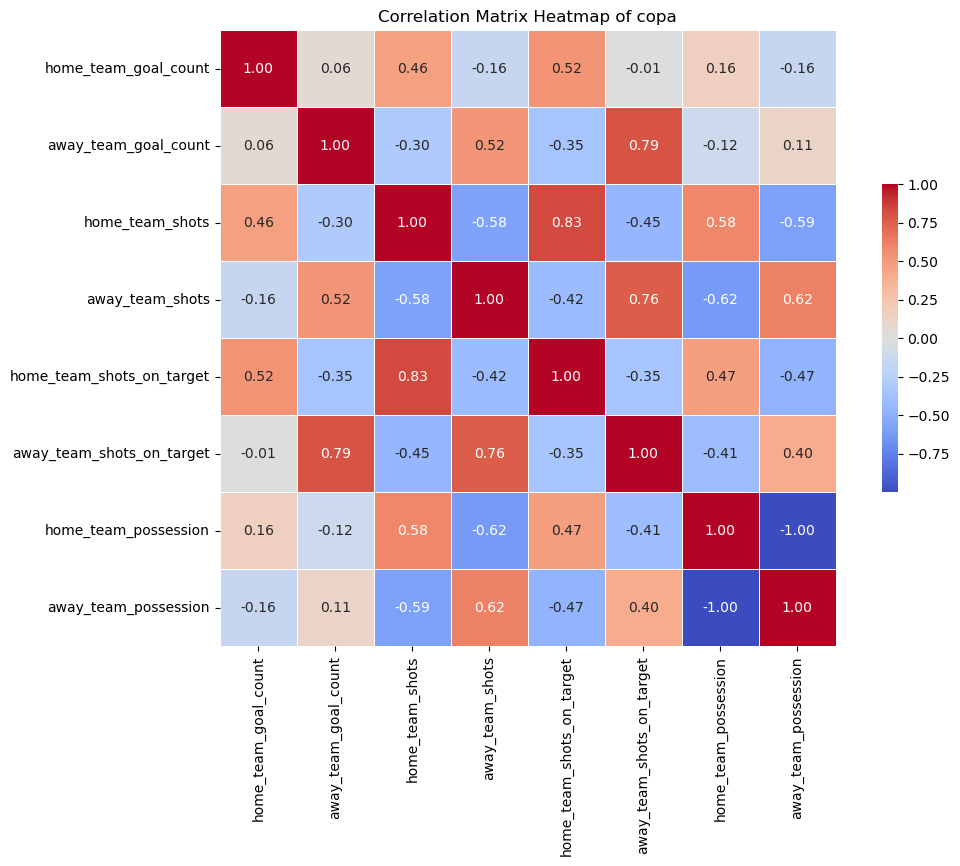

In [65]:
corr = copa_data_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix Heatmap of copa')
plt.show()

In [66]:
scaler = StandardScaler()
copa_data_df_numeric = copa_data_df.select_dtypes(include=['number'])


copa_data_df_numeric_stand = pd.DataFrame(scaler.fit_transform(copa_data_df_numeric), columns=copa_data_df_numeric.columns)
copa_data_df_standardized = pd.concat([copa_data_df_numeric_stand, copa_data_df.select_dtypes(exclude=['number'])], axis=1)


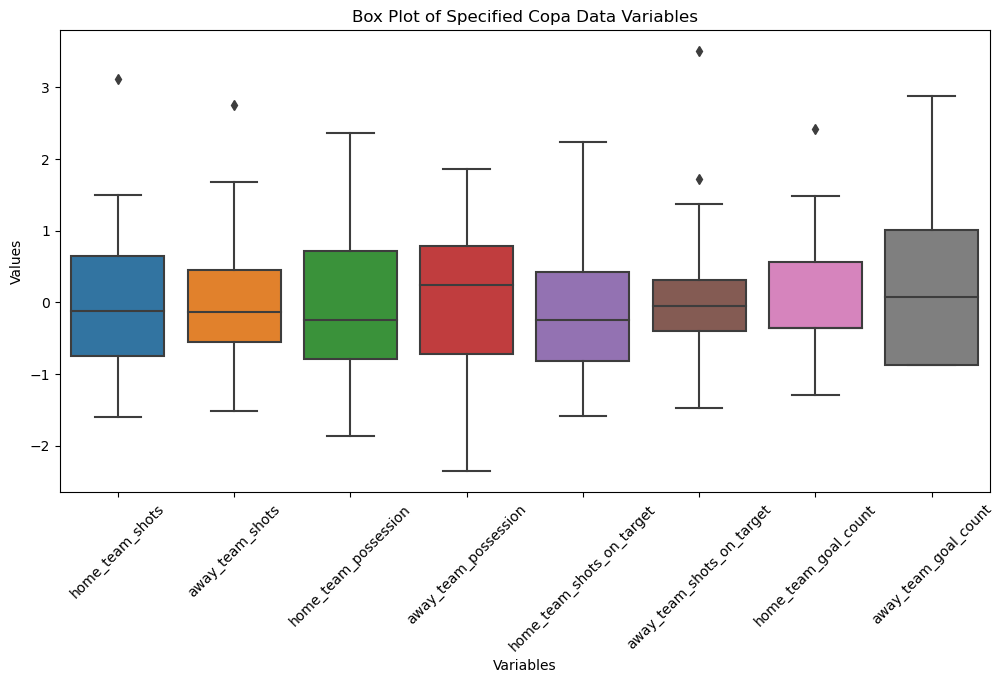

In [67]:
specified_columns = [
    'home_team_shots', 'away_team_shots', 'home_team_possession', 'away_team_possession',
    'home_team_shots_on_target', 'away_team_shots_on_target', 'home_team_goal_count', 'away_team_goal_count'
]
copa_data_df_filtered = copa_data_df_standardized[specified_columns]
melted_df_filtered = copa_data_df_filtered.melt(var_name='Variables', value_name='Values')
plt.figure(figsize=(12, 6))
sns.boxplot(x='Variables', y='Values', data=melted_df_filtered)
plt.xticks(rotation=45)
plt.title('Box Plot of Specified Copa Data Variables')
plt.show()

In [68]:
whole_data.columns

NameError: name 'whole_data' is not defined

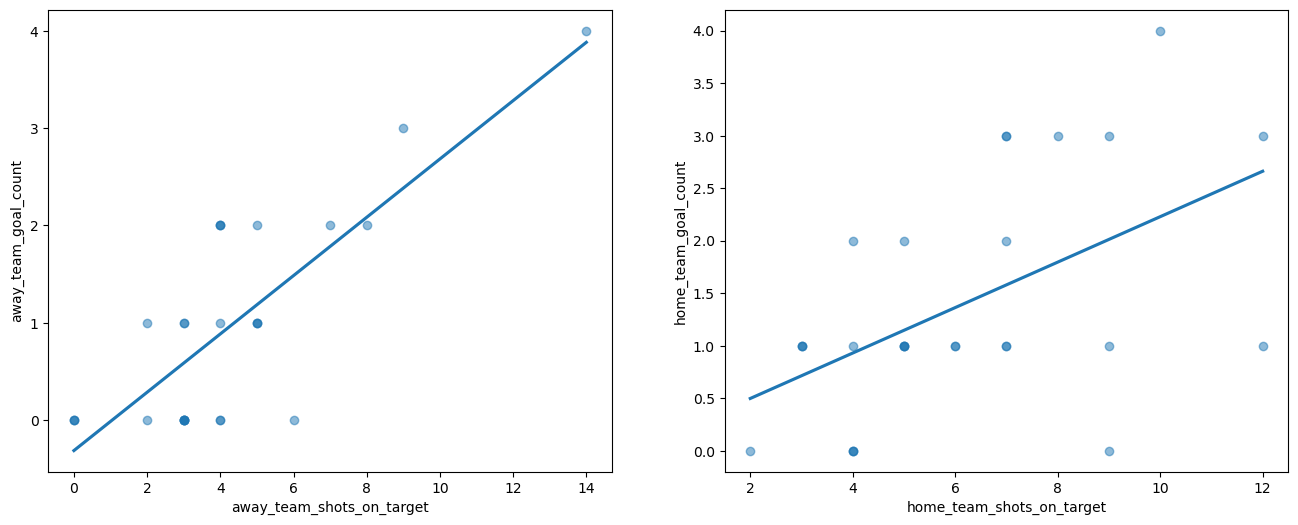

In [69]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.regplot(x='away_team_shots_on_target', y='away_team_goal_count', data=copa_data_df, ci=None, scatter_kws={'alpha':0.5}, ax=axs[0])

sns.regplot(x='home_team_shots_on_target', y='home_team_goal_count', data=copa_data_df, ci=None, scatter_kws={'alpha':0.5}, ax=axs[1])

plt.show()

Text(0.5, 1.0, 'Density Plot of away team shot')

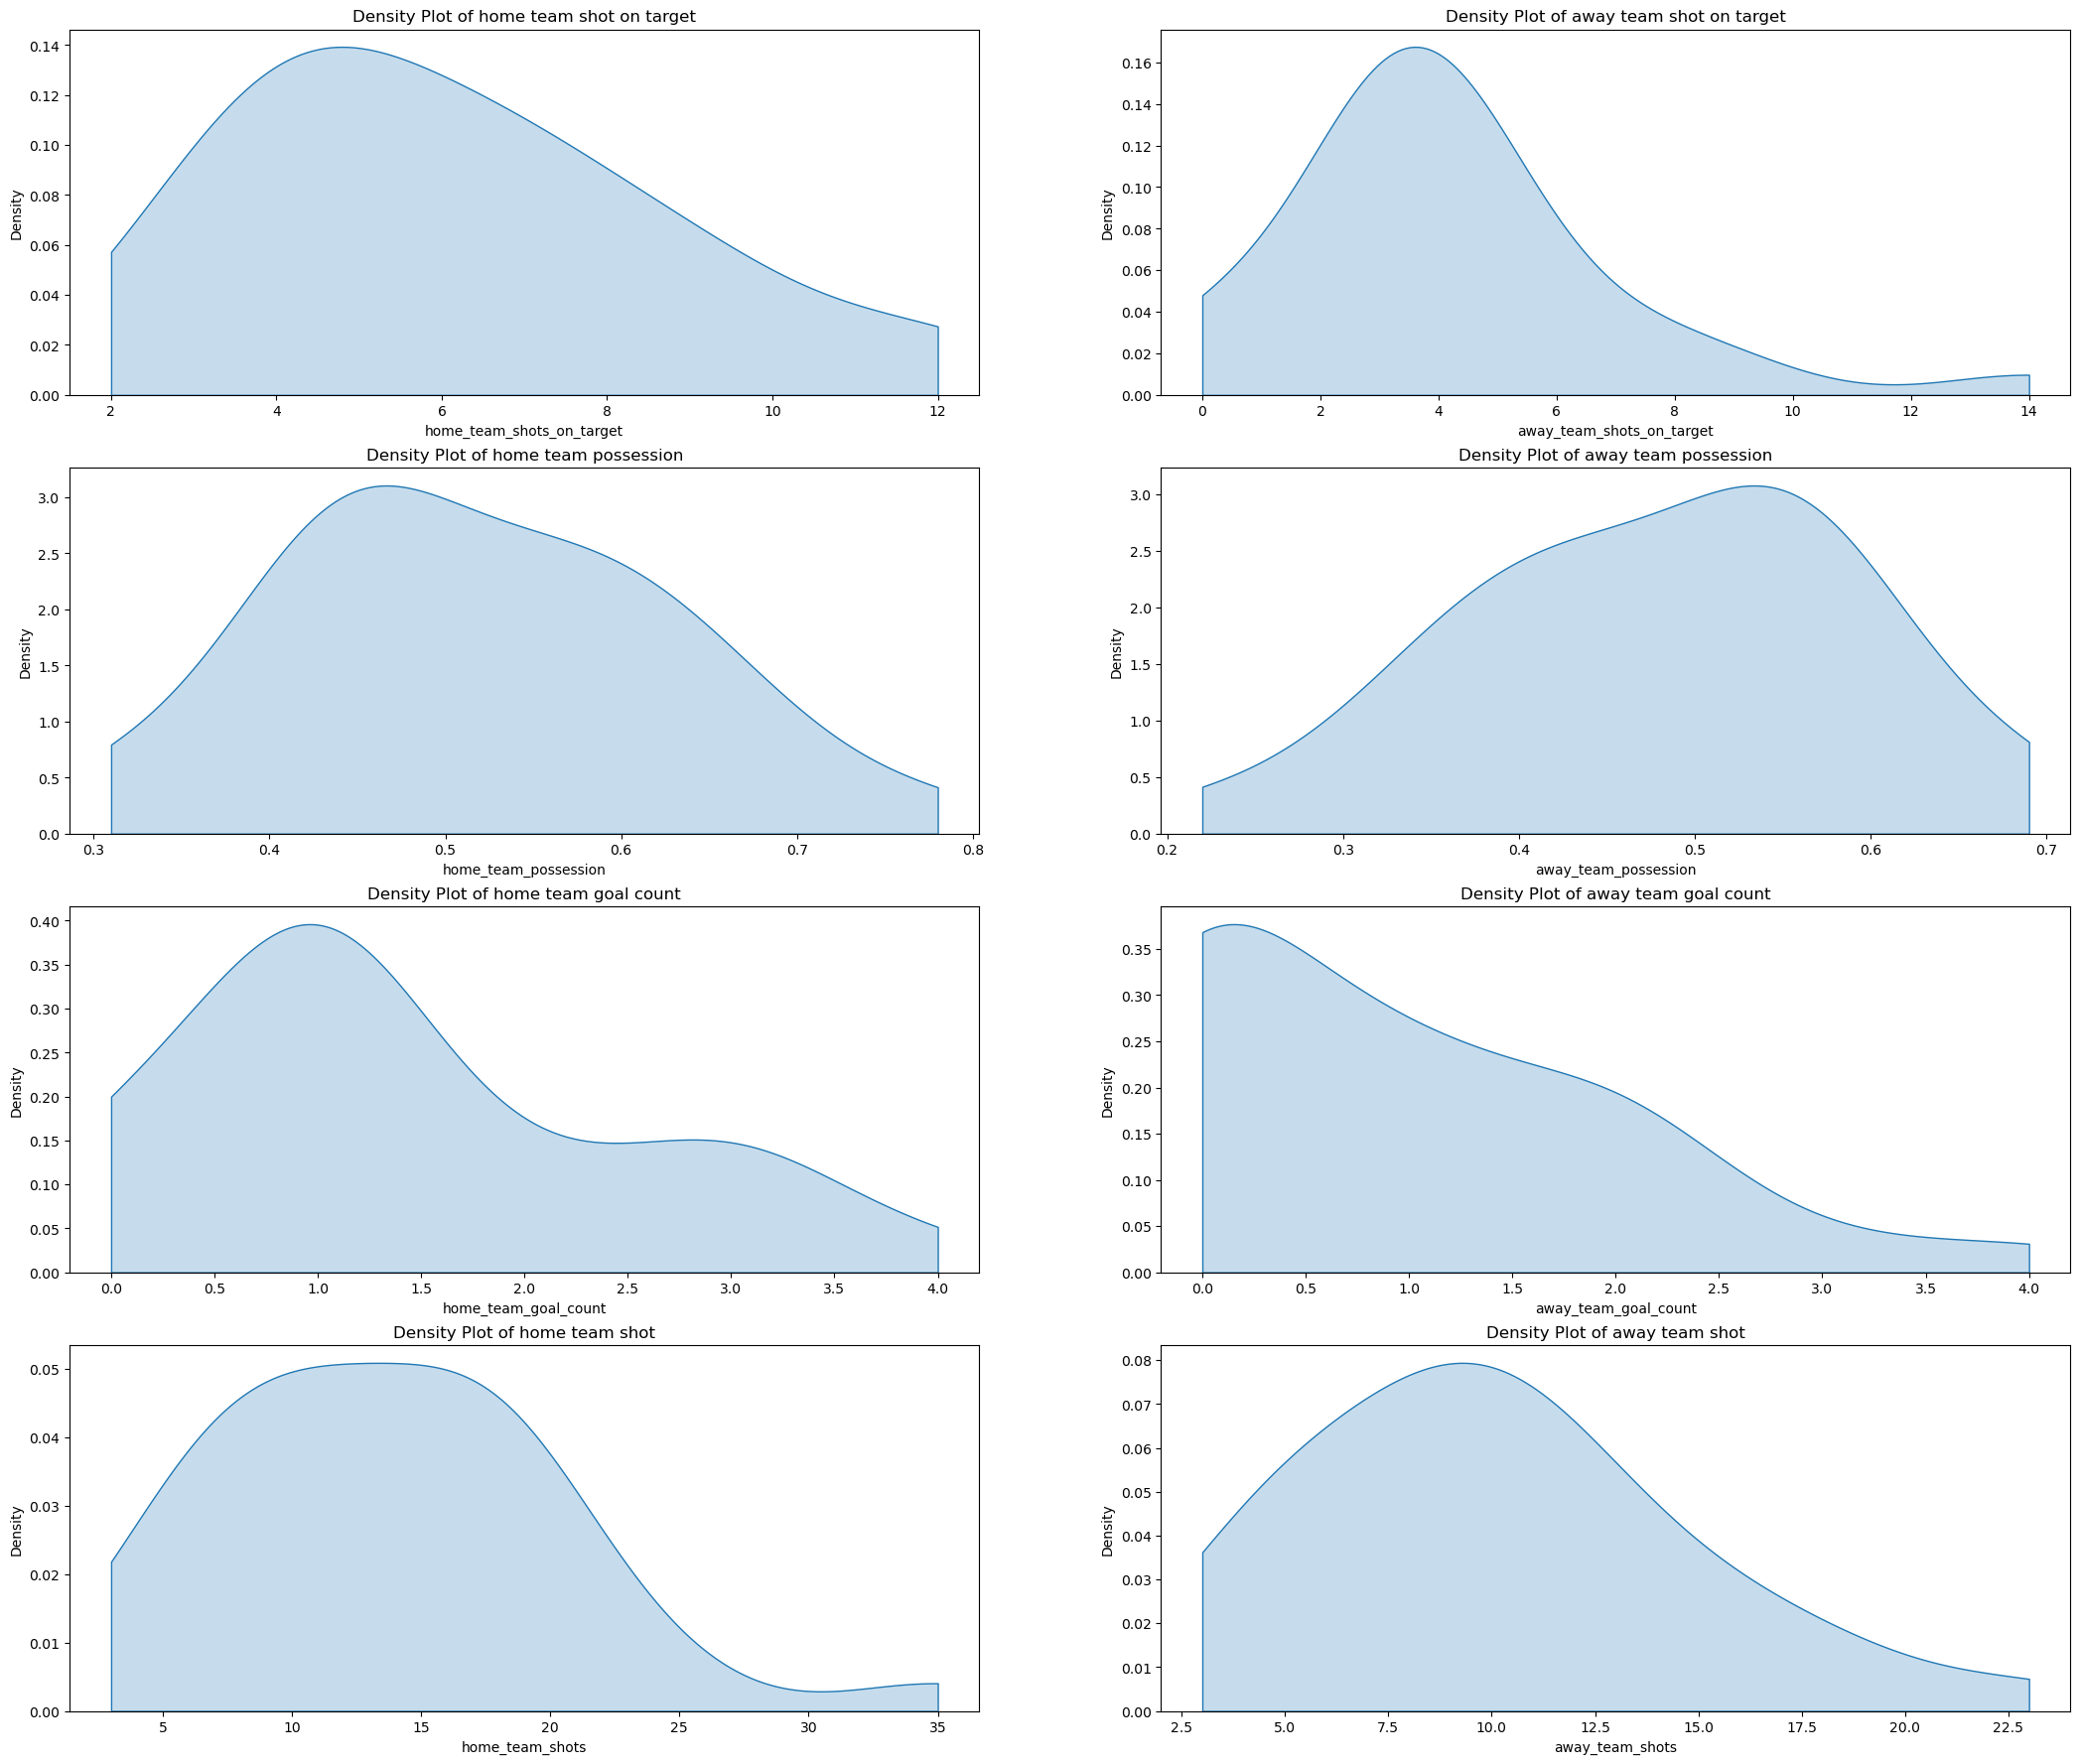

In [70]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(26, 22))
sns.kdeplot(copa_data_df['home_team_shots_on_target'], fill=True, ax=axs[0, 0], cut = 0)
axs[0, 0].set_title('Density Plot of home team shot on target')
sns.kdeplot(copa_data_df['away_team_shots_on_target'], fill=True, ax=axs[0, 1], cut = 0)
axs[0, 1].set_title('Density Plot of away team shot on target')
sns.kdeplot(copa_data_df['home_team_possession'], fill=True, ax=axs[1, 0], cut = 0)
axs[1, 0].set_title('Density Plot of home team possession')
sns.kdeplot(copa_data_df['away_team_possession'], fill=True, ax=axs[1, 1], cut = 0)
axs[1, 1].set_title('Density Plot of away team possession')
sns.kdeplot(copa_data_df['home_team_goal_count'], fill=True, ax=axs[2, 0], cut = 0)
axs[2, 0].set_title('Density Plot of home team goal count')
sns.kdeplot(copa_data_df['away_team_goal_count'], fill=True, ax=axs[2, 1], cut = 0)
axs[2, 1].set_title('Density Plot of away team goal count')
sns.kdeplot(copa_data_df['home_team_shots'], fill=True, ax=axs[3, 0], cut = 0)
axs[3, 0].set_title('Density Plot of home team shot')
sns.kdeplot(copa_data_df['away_team_shots'], fill=True, ax=axs[3, 1], cut = 0)
axs[3, 1].set_title('Density Plot of away team shot')

In [71]:
t_stat, p_value = stats.ttest_rel(copa_data_df['home_team_shots_on_target'], copa_data_df['away_team_shots_on_target'])
print(f't-test: {t_stat}, p-value :{p_value}')

t-test: 2.332133984329226, p-value :0.02739817118446396


In [72]:
t_stat, p_value = stats.ttest_rel(copa_data_df['home_team_goal_count'], copa_data_df['away_team_goal_count'])
print(f't-test: {t_stat}, p-value :{p_value}')

t-test: 1.6349650517862424, p-value :0.11366337148881847


In [ ]:
copa_data_df.columns

In [73]:
copa_home_df = copa_data_df[['home_team_name', 'home_team_goal_count', 'home_team_shots', 'home_team_shots_on_target', 'home_team_possession', 'home_team_outcome']]
copa_away_df = copa_data_df[['away_team_name', 'away_team_goal_count', 'away_team_shots', 'away_team_shots_on_target', 'away_team_possession', 'away_team_outcome']]

In [ ]:
copa_away_df.info()

In [ ]:
copa_home_df.columns

# Data engineering 

In [74]:
euro_home_df.rename(columns = {'team_name_home' : 'team_name',
                                'team_home_score' : 'team_goal',
                                'possession_home' : 'team_possession',
                                'total_shots_home': 'team_shot',
                               'shots_on_target_home': 'team_shot_on_target',
                               'outcome_home': 'team_outcome'
               }, inplace=True)
worldcup_home_df.rename(columns={
    'team1' : 'team_name',
    'possession team1' : 'team_possession',
    'number of goals team1' : 'team_goal',
    'total attempts team1' : 'team_shot',
    'on target attempts team1' : 'team_shot_on_target',
    'outcome_team1' : 'team_outcome'
}, inplace= True)
copa_home_df.rename(columns={
    'home_team_name' : 'team_name',
    'home_team_goal_count' : 'team_goal',
    'home_team_possession' : 'team_possession',
    'home_team_shots': 'team_shot',
   'home_team_shots_on_target': 'team_shot_on_target',
   'home_team_outcome': 'team_outcome'
}, inplace=True)

C:\Users\mouad\AppData\Local\Temp\ipykernel_6732\1592932829.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  euro_home_df.rename(columns = {'team_name_home' : 'team_name',
C:\Users\mouad\AppData\Local\Temp\ipykernel_6732\1592932829.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  worldcup_home_df.rename(columns={
C:\Users\mouad\AppData\Local\Temp\ipykernel_6732\1592932829.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copa_

In [ ]:
print(f'{euro_home_df.columns}\n {worldcup_home_df.columns}\n {copa_home_df.columns}')

In [75]:
euro_away_df.rename(columns = {'team_name_away' : 'team_name',
                                'team_away_score' : 'team_goal',
                                'possession_away' : 'team_possession',
                                'total_shots_away': 'team_shot',
                               'shots_on_target_away': 'team_shot_on_target',
                               'outcome_away': 'team_outcome'
               }, inplace=True)
worldcup_away_df.rename(columns={
    'team2' : 'team_name',
    'possession team2' : 'team_possession',
    'number of goals team2' : 'team_goal',
    'total attempts team2' : 'team_shot',
    'on target attempts team2' : 'team_shot_on_target',
    'outcome_team2' : 'team_outcome'
}, inplace= True)
copa_away_df.rename(columns={
    'away_team_name' : 'team_name',
    'away_team_goal_count' : 'team_goal',
    'away_team_possession' : 'team_possession',
    'away_team_shots': 'team_shot',
   'away_team_shots_on_target': 'team_shot_on_target',
   'away_team_outcome': 'team_outcome'
}, inplace=True)

C:\Users\mouad\AppData\Local\Temp\ipykernel_6732\1561918701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  euro_away_df.rename(columns = {'team_name_away' : 'team_name',
C:\Users\mouad\AppData\Local\Temp\ipykernel_6732\1561918701.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  worldcup_away_df.rename(columns={
C:\Users\mouad\AppData\Local\Temp\ipykernel_6732\1561918701.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copa_

In [76]:
print(f'{euro_away_df.columns}\n {worldcup_away_df.columns}\n {copa_away_df.columns}')

Index(['team_name', 'team_goal', 'team_possession', 'team_shot',
       'team_shot_on_target', 'team_outcome'],
      dtype='object')
 Index(['team_name', 'team_possession', 'team_goal', 'team_shot',
       'team_shot_on_target', 'team_outcome'],
      dtype='object')
 Index(['team_name', 'team_goal', 'team_shot', 'team_shot_on_target',
       'team_possession', 'team_outcome'],
      dtype='object')


In [78]:
home_data_combined = pd.concat([euro_home_df, worldcup_home_df, copa_home_df], ignore_index=True)

In [79]:
away_data_combined = pd.concat([euro_away_df, worldcup_away_df, copa_away_df], ignore_index=True)

In [80]:
home_data_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team_name            143 non-null    object 
 1   team_goal            143 non-null    int64  
 2   team_possession      143 non-null    float64
 3   team_shot            143 non-null    int64  
 4   team_shot_on_target  143 non-null    int64  
 5   team_outcome         143 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 6.8+ KB


In [ ]:
away_data_combined.shape

In [81]:
whole_data = pd.concat([home_data_combined, away_data_combined], axis=0)

In [ ]:
worldCup_data.shape

In [83]:
whole_data.head()

,team_name,team_goal,team_possession,team_shot,team_shot_on_target,team_outcome
0,Italy,1,0.66,19,6,1
1,England,2,0.59,20,10,1
2,Italy,1,0.29,7,4,1
3,Ukraine,0,0.48,7,2,0
4,Czech Republic,1,0.56,16,5,0


In [84]:
csv_file = "output_file.csv"
whole_data.to_csv(csv_file, index=False)

In [95]:
print(euro_data_df['possession_home'].describe())
print(worldCup_data['possession team1'].describe())
print(copa_data_df['home_team_possession'].describe())

count    51.000000
mean      0.498431
std       0.135873
min       0.270000
25%       0.410000
50%       0.480000
75%       0.585000
max       0.860000
Name: possession_home, dtype: float64
count    64.00000
mean      0.44625
std       0.11917
min       0.14000
25%       0.34750
50%       0.46000
75%       0.53000
max       0.74000
Name: possession team1, dtype: float64
count    28.000000
mean      0.517857
std       0.113018
min       0.310000
25%       0.430000
50%       0.490000
75%       0.597500
max       0.780000
Name: home_team_possession, dtype: float64


In [96]:
whole_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 0 to 142
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team_name            286 non-null    object 
 1   team_goal            286 non-null    int64  
 2   team_possession      286 non-null    float64
 3   team_shot            286 non-null    int64  
 4   team_shot_on_target  286 non-null    int64  
 5   team_outcome         286 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 15.6+ KB


In [97]:
whole_data['team_outcome'] = whole_data['team_outcome'].astype(int)

In [98]:
whole_data.describe()

,team_goal,team_possession,team_shot,team_shot_on_target,team_outcome
count,286.000000,286.000000,286.000000,286.000000,286.000000
mean,1.325175,0.473531,11.706294,4.241259,0.804196
std,1.257621,0.127151,5.751988,2.708242,0.751688
min,0.000000,0.140000,0.000000,0.000000,0.000000
25%,0.000000,0.382500,8.000000,2.000000,0.000000
50%,1.000000,0.470000,11.000000,4.000000,1.000000
75%,2.000000,0.550000,15.000000,6.000000,1.000000
max,7.000000,0.860000,35.000000,14.000000,2.000000


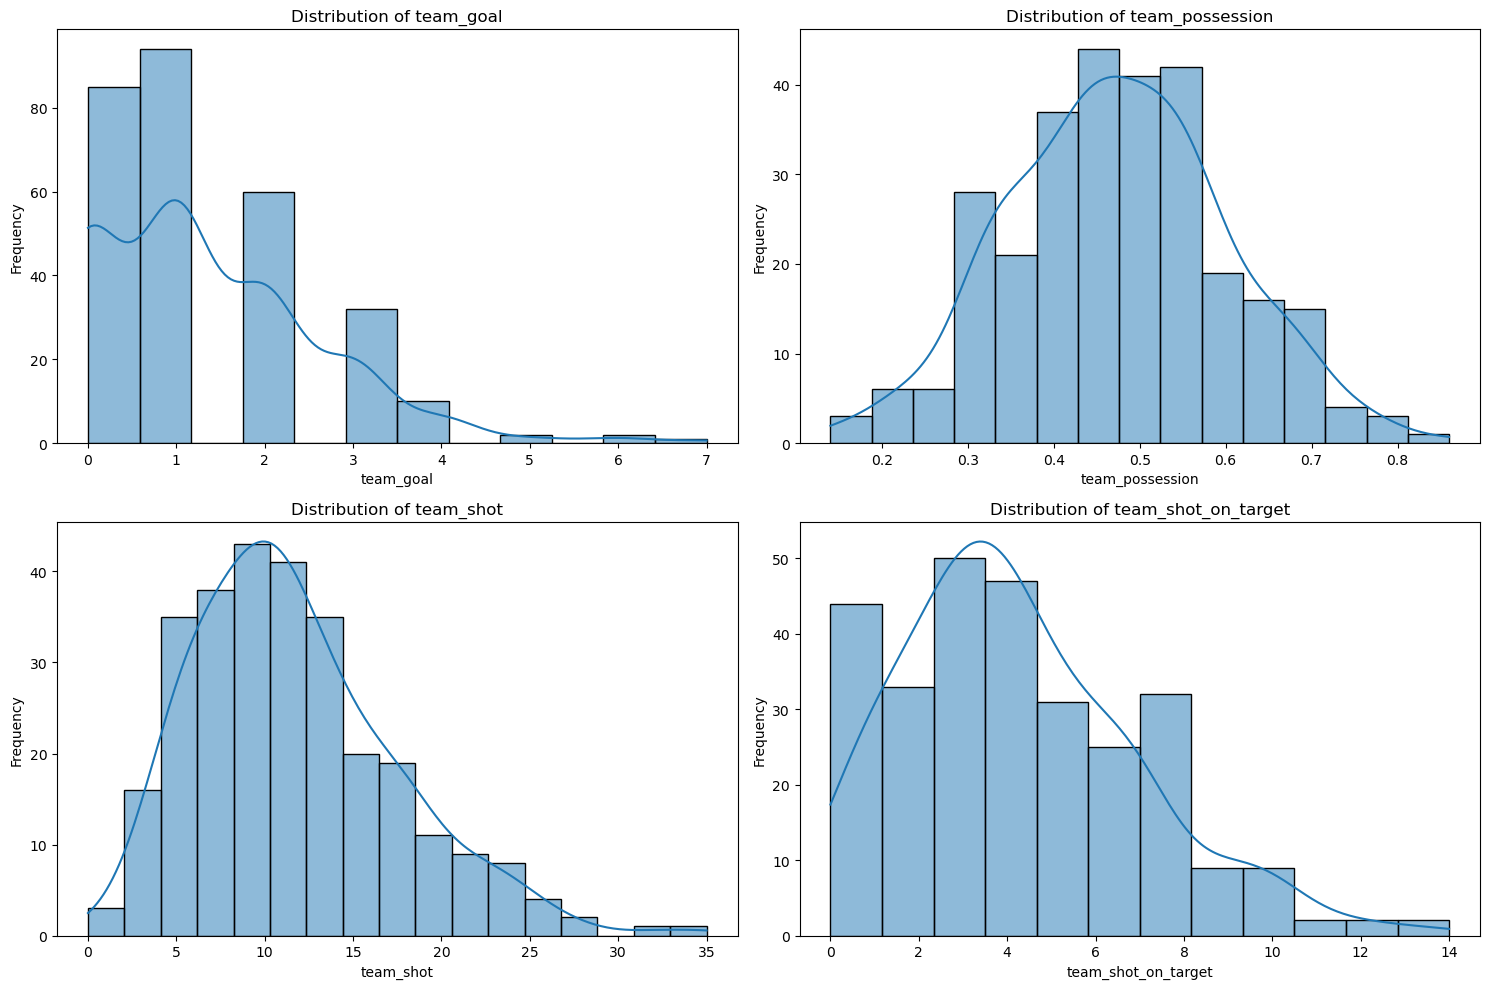

In [99]:
numerical_variables = ['team_goal', 'team_possession', 'team_shot', 'team_shot_on_target']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  
axes = axes.flatten()

for i, variable in enumerate(numerical_variables):
    sns.histplot(whole_data[variable], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {variable}')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [100]:
whole_data.head(100)

,team_name,team_goal,team_possession,team_shot,team_shot_on_target,team_outcome
0,Italy,1,0.66,19,6,1
1,England,2,0.59,20,10,1
2,Italy,1,0.29,7,4,1
3,Ukraine,0,0.48,7,2,0
4,Czech Republic,1,0.56,16,5,0
...,...,...,...,...,...,...
95,GHANA,0,0.46,9,4,0
96,KOREA REPUBLIC,2,0.34,12,6,1
97,SERBIA,2,0.45,11,4,0
98,CAMEROON,1,0.31,7,3,1


In [101]:
test = whole_data.reset_index(drop=True)


In [102]:
test.shape

(286, 6)

In [104]:
X = whole_data.drop(['team_name', 'team_outcome'], axis=1)
y = whole_data['team_outcome']

In [105]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [107]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [157]:
print(X_train_scaled)
print(y_encoded)

[[-2.39054529e-01  6.26351313e-01  7.15522362e-01  1.70624003e+00]
 [-2.39054529e-01  1.72066625e+00  1.91005551e+00  6.11429353e-01]
 [ 5.28613536e-01  3.91855255e-01  3.74227177e-01 -1.18444430e-01]
 [-2.39054529e-01 -5.46128977e-01 -9.90953564e-01 -4.83381321e-01]
 [ 5.28613536e-01  3.91855255e-01  2.08070310e+00  2.07117692e+00]
 [-2.39054529e-01  2.35524550e-01  7.15522362e-01 -1.18444430e-01]
 [ 1.29628160e+00  1.48617019e+00 -1.37715601e-01  6.11429353e-01]
 [-2.39054529e-01 -1.48411321e+00 -3.08363194e-01 -8.48318213e-01]
 [-2.39054529e-01 -2.33467567e-01  1.39811273e+00  2.43611381e+00]
 [ 5.28613536e-01 -7.71368612e-02 -3.08363194e-01  2.46492462e-01]
 [ 1.29628160e+00 -1.24961715e+00  3.29319916e-02  9.76366245e-01]
 [-2.39054529e-01 -4.67963625e-01 -3.08363194e-01 -8.48318213e-01]
 [ 2.06394967e+00  1.32983949e+00  7.15522362e-01  2.07117692e+00]
 [-1.00672259e+00  1.25167413e+00  1.05681755e+00  6.11429353e-01]
 [ 5.28613536e-01  2.18965837e+00  1.05681755e+00  9.76366245e

# Logistic Regression

In [175]:
model = LogisticRegression(random_state=42, max_iter=2000, multi_class='multinomial', solver='lbfgs')
model.fit(X_train_scaled, y_train)

predictions = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)

scores = cross_val_score(model, X, y_encoded, cv=5, scoring='accuracy')

print(f"Average CV Accuracy: {np.mean(scores)}")
print(f"Multinomial logistic regression Accuracy: {accuracy}")
class_report = classification_report(y_test, predictions)
print("\nClassification Report:\n", class_report)

Average CV Accuracy: 0.6329703569267997
Multinomial logistic regression Accuracy: 0.6551724137931034

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.90      0.67        20
           1       0.83      0.77      0.80        26
           2       0.00      0.00      0.00        12

    accuracy                           0.66        58
   macro avg       0.45      0.56      0.49        58
weighted avg       0.56      0.66      0.59        58



C:\Users\mouad\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mouad\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mouad\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [176]:
param_grid = {
    'C': np.logspace(-4, 4, 20),  
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']  
}

model = LogisticRegression(random_state=42, max_iter=2000, multi_class='multinomial')

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search.fit(X_train_scaled, y_train)
best_estimator = grid_search.best_estimator_
predictions = best_estimator.predict(X_test_scaled)
accuracy_hy = accuracy_score(y_test, predictions)

scores = cross_val_score(best_estimator, X, y_encoded, cv=5, scoring='accuracy')

print(f"Best parameters found: {grid_search.best_params_}")
print(f"Average CV Accuracy: {np.mean(scores)}")
print(f"Multinomial logistic regression Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_report(y_test, predictions))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found: {'C': 0.615848211066026, 'solver': 'newton-cg'}
Average CV Accuracy: 0.6329703569267997
Multinomial logistic regression Accuracy: 0.6551724137931034

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.90      0.67        20
           1       0.83      0.77      0.80        26
           2       0.00      0.00      0.00        12

    accuracy                           0.66        58
   macro avg       0.45      0.56      0.49        58
weighted avg       0.56      0.66      0.59        58



C:\Users\mouad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mouad\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mouad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1519, in fit
    multi_class = _check_multi_class(self.multi_class, solver, len(self.classes_))
  File "C:\Users\mouad\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 483, in _check_multi_class


In [177]:
best_params = {'C': 0.615848211066026, 'multi_class': 'multinomial', 'solver': 'newton-cg'}

model = LogisticRegression(**best_params, random_state=42, max_iter=2000)

model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
scores = cross_val_score(model, X, y_encoded, cv=5, scoring='accuracy')

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Average CV Accuracy: {np.mean(scores)}")
print(f"\nMultinomial logistic regression Accuracy: {accuracy}")
print("\nClassification Report:\n", class_report)
print("\nConfusion Matrix:\n", conf_matrix)

Average CV Accuracy: 0.6329703569267997

Multinomial logistic regression Accuracy: 0.6551724137931034

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.90      0.67        20
           1       0.83      0.77      0.80        26
           2       0.00      0.00      0.00        12

    accuracy                           0.66        58
   macro avg       0.45      0.56      0.49        58
weighted avg       0.56      0.66      0.59        58


Confusion Matrix:
 [[18  2  0]
 [ 6 20  0]
 [10  2  0]]


# Random Forest

In [190]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_scaled, y_train)
predictions_rf = rf_model.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, predictions_rf)
scores = cross_val_score(rf_model, X, y_encoded, cv=5, scoring='accuracy')
class_report = classification_report(y_test, predictions_rf)

print(f"Average CV Accuracy: {np.mean(scores)}")
print(f"\nRandom Forest Model Accuracy: {accuracy_rf}")
print("\nClassification Report:\n", class_report)


Average CV Accuracy: 0.5490018148820326

Random Forest Model Accuracy: 0.46551724137931033

Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.55      0.49        20
           1       0.62      0.58      0.60        26
           2       0.11      0.08      0.10        12

    accuracy                           0.47        58
   macro avg       0.39      0.40      0.39        58
weighted avg       0.45      0.47      0.46        58



# Hyperparameter for RF

In [179]:
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['auto', 'sqrt'] 
}

rf_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("\nBest cross-validated accuracy: ", grid_search.best_score_)

best_rf_model = grid_search.best_estimator_
predictions_rf = best_rf_model.predict(X_test_scaled)

accuracy_rf = accuracy_score(y_test, predictions_rf)
class_report = classification_report(y_test, predictions_rf)

print(f"\nRandom Forest Model Accuracy: {accuracy_rf}")
print("\nClassification Report:\n", class_report)

Best parameters found:  {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}

Best cross-validated accuracy:  0.6357487922705315

Random Forest Model Accuracy: 0.5862068965517241

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.65      0.59        20
           1       0.70      0.81      0.75        26
           2       0.00      0.00      0.00        12

    accuracy                           0.59        58
   macro avg       0.41      0.49      0.45        58
weighted avg       0.50      0.59      0.54        58



In [185]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

rf_model = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=None, min_samples_leaf=4, min_samples_split=2, max_features='auto')
rf_model.fit(X_train_smote, y_train_smote)

predictions_rf = rf_model.predict(X_test)
scores = cross_val_score(rf_model, X, y_encoded, cv=5, scoring='accuracy')

accuracy_rf = accuracy_score(y_test, predictions_rf)
class_report = classification_report(y_test, predictions_rf)

print(f"Average CV Accuracy: {np.mean(scores)}")
print(f"\nRandom Forest Model Accuracy after SMOTE: {accuracy_rf}")
print("\nClassification Report after SMOTE:\n", class_report)

Average CV Accuracy: 0.6013914095583787

Random Forest Model Accuracy after SMOTE: 0.5689655172413793

Classification Report after SMOTE:
               precision    recall  f1-score   support

           0       0.55      0.55      0.55        20
           1       0.75      0.69      0.72        26
           2       0.29      0.33      0.31        12

    accuracy                           0.57        58
   macro avg       0.53      0.53      0.53        58
weighted avg       0.58      0.57      0.58        58



# Gardian boosting

In [126]:
gbm_model = GradientBoostingClassifier(random_state=42, n_estimators=100)
gbm_model.fit(X_train_scaled, y_train)

predictions_gbm = gbm_model.predict(X_test_scaled)
accuracy_gbm = accuracy_score(y_test, predictions_gbm)
scores = cross_val_score(model, X, y_encoded, cv=5, scoring='accuracy')
class_report = classification_report(y_test, predictions_gbm)

print(f"Average CV Accuracy: {np.mean(scores)}")

print(f"Gradient Boosting Model Accuracy: {accuracy_gbm}")
print("\nClassification Report after SMOTE:\n", class_report)

Average CV Accuracy: 0.6503327283726558
Gradient Boosting Model Accuracy: 0.5

Classification Report after SMOTE:
               precision    recall  f1-score   support

           0       0.43      0.60      0.50        20
           1       0.71      0.58      0.64        26
           2       0.22      0.17      0.19        12

    accuracy                           0.50        58
   macro avg       0.46      0.45      0.44        58
weighted avg       0.51      0.50      0.50        58



In [161]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    'max_features': [None, 'sqrt']
}

gbm = GradientBoostingClassifier(random_state=42)

grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'max_features': [None, 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [162]:
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validated accuracy: ", grid_search.best_score_)

best_gbm_model = grid_search.best_estimator_

predictions_gbm = best_gbm_model.predict(X_test_scaled)
accuracy_gbm = accuracy_score(y_test, predictions_gbm)
class_report_gbm = classification_report(y_test, predictions_gbm)

print(f"Gradient Boosting Model Accuracy with Best Hyperparameters: {accuracy_gbm}")
print("\nClassification Report with Best Hyperparameters:\n", class_report_gbm)

Best parameters found:  {'learning_rate': 0.01, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}
Best cross-validated accuracy:  0.6446376811594203
Gradient Boosting Model Accuracy with Best Hyperparameters: 0.603448275862069

Classification Report with Best Hyperparameters:
               precision    recall  f1-score   support

           0       0.50      0.85      0.63        20
           1       0.75      0.69      0.72        26
           2       0.00      0.00      0.00        12

    accuracy                           0.60        58
   macro avg       0.42      0.51      0.45        58
weighted avg       0.51      0.60      0.54        58



C:\Users\mouad\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mouad\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mouad\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# MLP classifier

In [165]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

mlp = MLPClassifier(max_iter=5000, random_state=42, early_stopping=True, validation_fraction=0.1)

grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters found: ", best_params)

Best parameters found:  {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 50), 'learning_rate': 'constant', 'solver': 'adam'}
Best cross-validated accuracy:  0.6314009661835749


In [189]:
mlp = MLPClassifier(
    activation='tanh',
    alpha=0.0001,
    hidden_layer_sizes=(100,50),
    learning_rate='constant',
    solver='adam',
    max_iter=3000,
    random_state=42,
    early_stopping=True, 
    validation_fraction=0.10,  # 10% of data 
    n_iter_no_change=10
)


mlp.fit(X_train_scaled, y_train)
predictions_mlp_hyp = mlp.predict(X_test_scaled)
print("MLP model accuracy: ", accuracy_score(y_test, predictions_mlp_hyp))
print("Best cross-validated accuracy: ", best_score)
report = classification_report(y_test, predictions_mlp_hyp)
print("Classification Report for MLP:\n", report)

MLP model accuracy:  0.603448275862069
Best cross-validated accuracy:  0.6314009661835749
Classification Report for MLP:
               precision    recall  f1-score   support

           0       0.54      0.70      0.61        20
           1       0.66      0.81      0.72        26
           2       0.00      0.00      0.00        12

    accuracy                           0.60        58
   macro avg       0.40      0.50      0.44        58
weighted avg       0.48      0.60      0.53        58



C:\Users\mouad\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mouad\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mouad\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [211]:
whole_data.columns

Index(['team_name', 'team_goal', 'team_possession', 'team_shot',
       'team_shot_on_target', 'team_outcome'],
      dtype='object')

# Presentation graphs

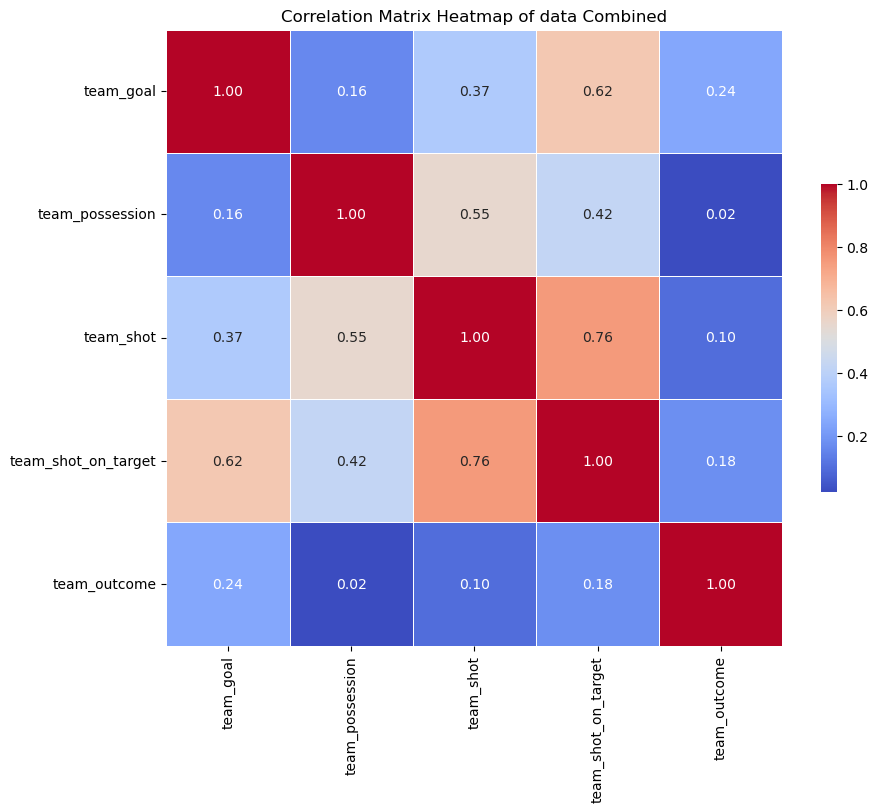

In [217]:
corr = whole_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix Heatmap of data Combined')
plt.show()

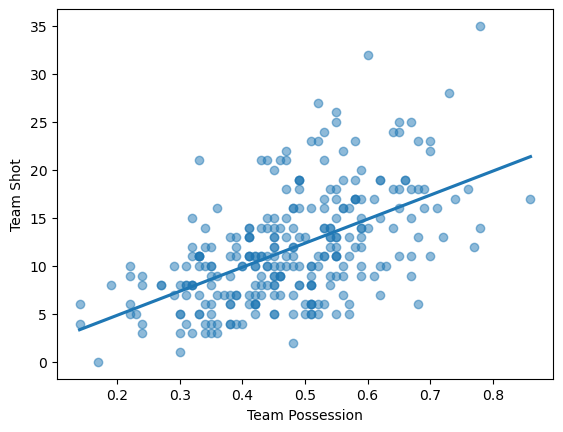

In [225]:
sns.regplot(x='team_possession', y='team_shot', data=whole_data, ci=None, scatter_kws={'alpha':0.5})
plt.xlabel('Team Possession')
plt.ylabel('Team Shot')
plt.show()

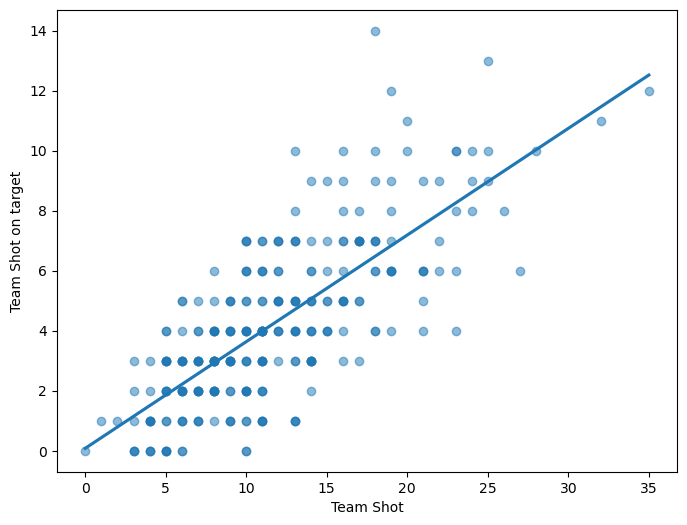

In [226]:
plt.figure(figsize=(8, 6))
sns.regplot(x='team_shot', y='team_shot_on_target', data=whole_data, ci=None, scatter_kws={'alpha':0.5})
plt.xlabel('Team Shot')
plt.ylabel('Team Shot on target')
plt.show()

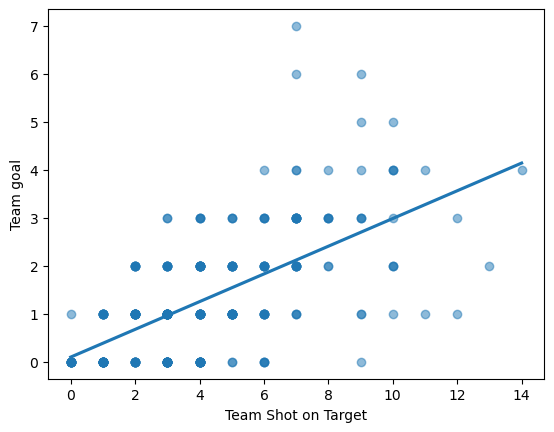

In [227]:
sns.regplot(x='team_shot_on_target', y='team_goal', data=whole_data, ci=None, scatter_kws={'alpha':0.5})
plt.xlabel('Team Shot on Target')
plt.ylabel('Team goal')
plt.show()

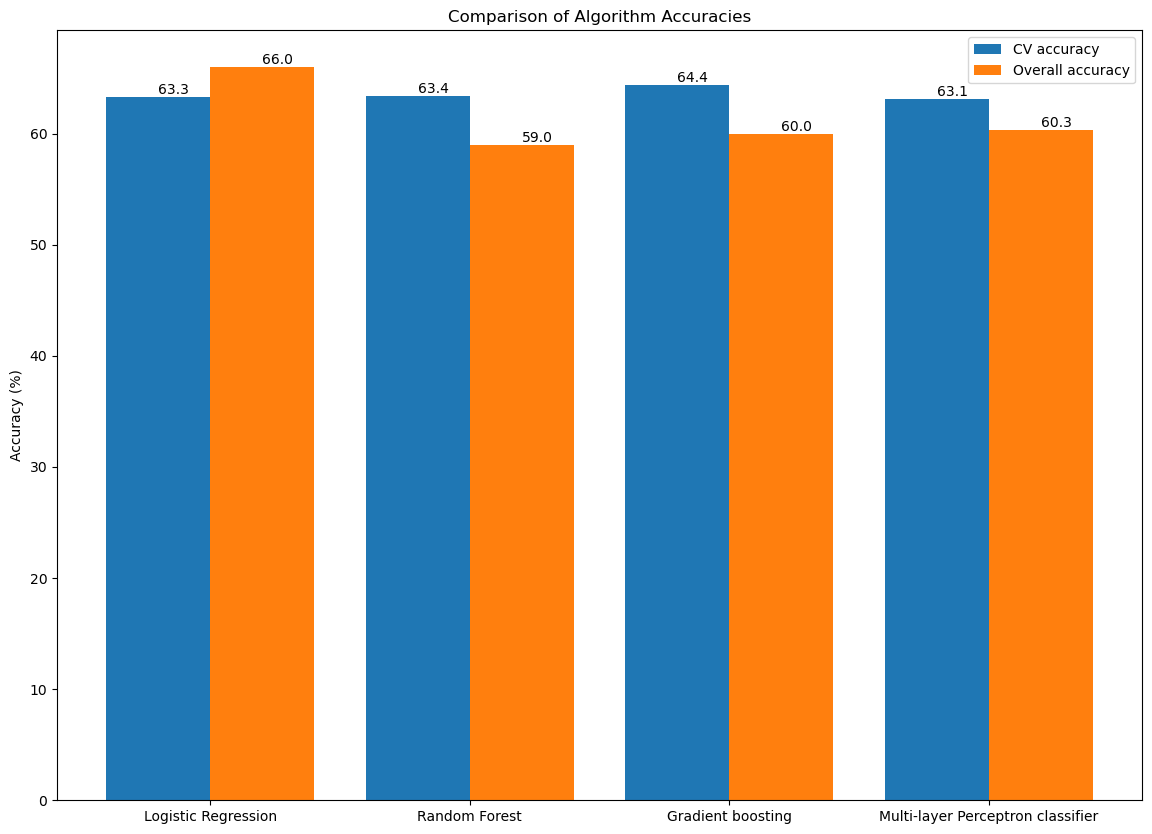

In [235]:
fig, ax = plt.subplots(figsize=(14, 10))
cv_bars = ax.bar(positions, df['CV accuracy'], width, label='CV accuracy', align='center')
ov_bars = ax.bar([p + width for p in positions], df['Overall accuracy'], width, label='Overall accuracy', align='center')
ax.set_xticks([p + width / 2 for p in positions])
ax.set_xticklabels(df['Algorithm'])
ax.set_ylabel('Accuracy (%)')
ax.set_title('Comparison of Algorithm Accuracies')
ax.legend()

for bar in cv_bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 1), va='bottom')

for bar in ov_bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 1), va='bottom')

plt.show()


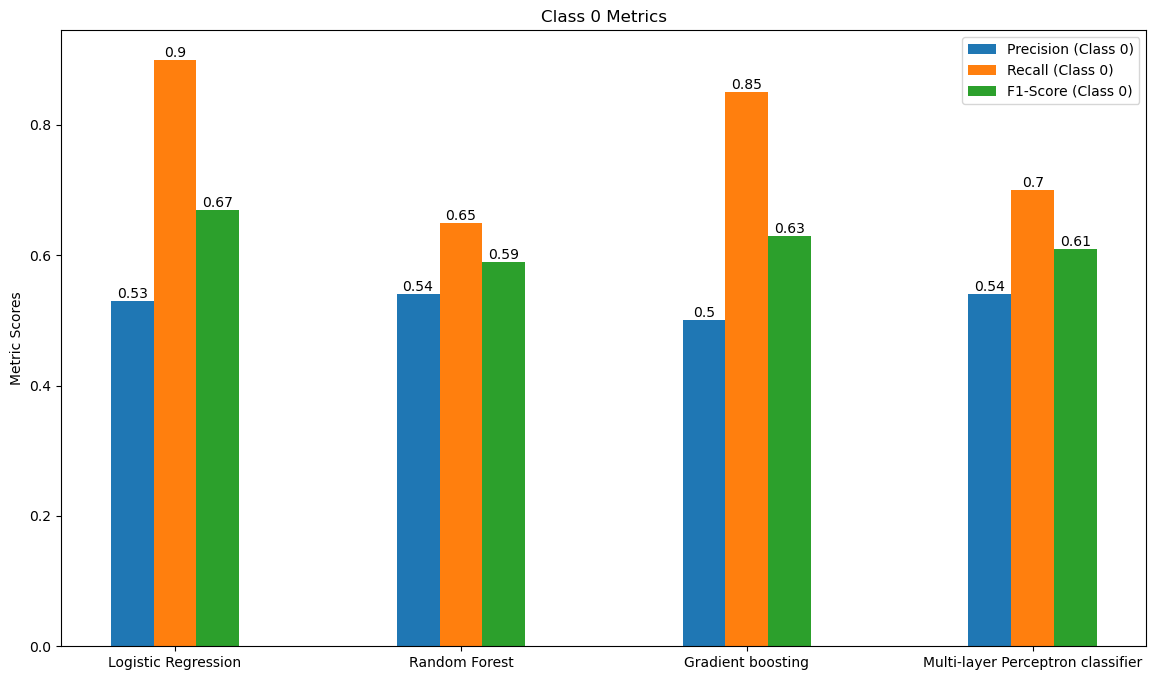

In [239]:
def add_value_labels(ax, bars):
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

fig, ax0 = plt.subplots(figsize=(14, 8))
bars0_precision = ax0.bar([p - width for p in positions], df_combined['Precision (Class 0)'], width, label='Precision (Class 0)')
bars0_recall = ax0.bar(positions, df_combined['Recall (Class 0)'], width, label='Recall (Class 0)')
bars0_f1 = ax0.bar([p + width for p in positions], df_combined['F1-Score (Class 0)'], width, label='F1-Score (Class 0)')

add_value_labels(ax0, bars0_precision)
add_value_labels(ax0, bars0_recall)
add_value_labels(ax0, bars0_f1)

ax0.set_xticks(positions)
ax0.set_xticklabels(df_combined['Algorithm'])
ax0.set_ylabel('Metric Scores')
ax0.set_title('Class 0 Metrics')
ax0.legend()

plt.show()


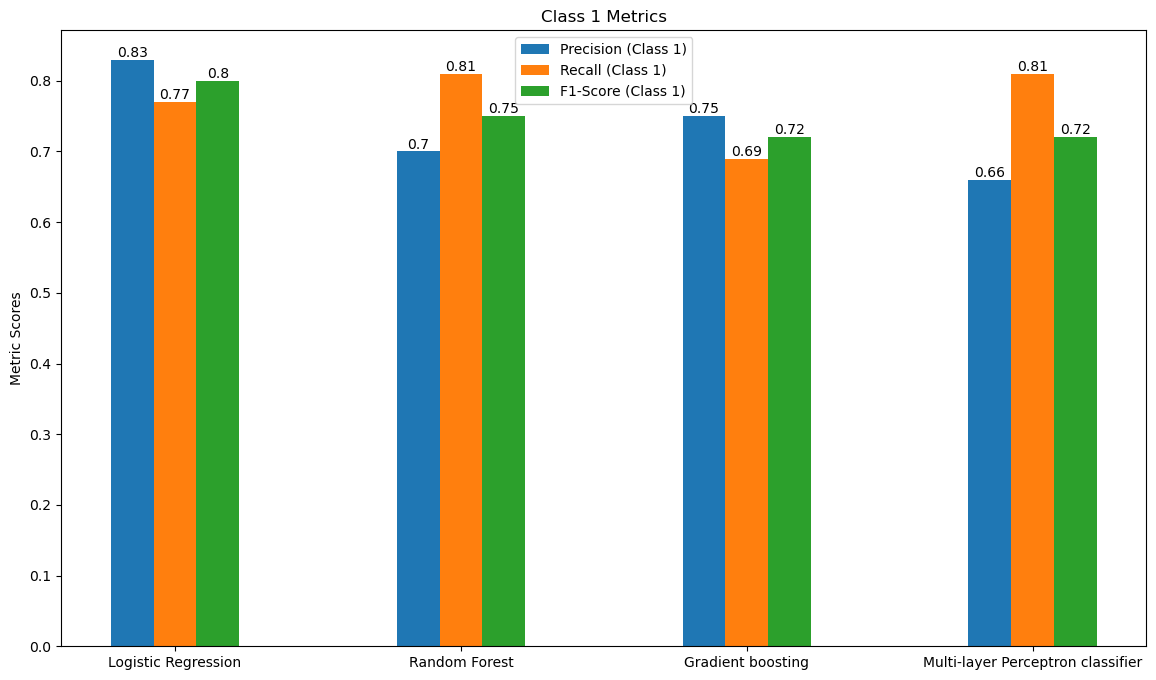

In [240]:
def add_value_labels(ax, bars):
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')
        
fig, ax1 = plt.subplots(figsize=(14, 8))
bars1_precision = ax1.bar([p - width for p in positions], df_combined['Precision (Class 1)'], width, label='Precision (Class 1)')
bars1_recall = ax1.bar(positions, df_combined['Recall (Class 1)'], width, label='Recall (Class 1)')
bars1_f1 = ax1.bar([p + width for p in positions], df_combined['F1-Score (Class 1)'], width, label='F1-Score (Class 1)')

add_value_labels(ax1, bars1_precision)
add_value_labels(ax1, bars1_recall)
add_value_labels(ax1, bars1_f1)

ax1.set_xticks(positions)
ax1.set_xticklabels(df_combined['Algorithm'])
ax1.set_ylabel('Metric Scores')
ax1.set_title('Class 1 Metrics')
ax1.legend()

plt.show()
